# 観測ロケットMOMO1のテレメトリtelem3の結果可視化
2017年7月29日に打上げたMOMO1の結果であるCバンドテレメトリ（telem3）を可視化
T+34秒以降ではパケット落ちを確認している。


## 環境
Python 3.5 Anaconda

グラフが日本語表示されない場合は... http://qiita.com/knknkn1162/items/be87cba14e38e2c0f656

### 外部モジュール
https://github.com/moble/quaternion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import pi, deg2rad, rad2deg, sin, cos
import quaternion
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
%config InlineBackend.figure_format = 'retina'

In [2]:
df_000 = pd.read_csv("../csv/telem3/telem3_000.csv")
df_001 = pd.read_csv("../csv/telem3/telem3_001.csv")
df_004 = pd.read_csv("../csv/telem3/telem3_004.csv")
df_005 = pd.read_csv("../csv/telem3/telem3_005.csv")
df_006 = pd.read_csv("../csv/telem3/telem3_006.csv")
df_007 = pd.read_csv("../csv/telem3/telem3_007.csv")
df_008 = pd.read_csv("../csv/telem3/telem3_008.csv")
df_01a = pd.read_csv("../csv/telem3/telem3_01a.csv")
df_01b = pd.read_csv("../csv/telem3/telem3_01b.csv")
df_020 = pd.read_csv("../csv/telem3/telem3_020.csv")
df_021 = pd.read_csv("../csv/telem3/telem3_021.csv")
df_022 = pd.read_csv("../csv/telem3/telem3_022.csv")
df_023 = pd.read_csv("../csv/telem3/telem3_023.csv")
df_024 = pd.read_csv("../csv/telem3/telem3_024.csv")
df_025 = pd.read_csv("../csv/telem3/telem3_025.csv")
df_026 = pd.read_csv("../csv/telem3/telem3_026.csv")
df_030 = pd.read_csv("../csv/telem3/telem3_030.csv")
df_031 = pd.read_csv("../csv/telem3/telem3_031.csv")
df_032 = pd.read_csv("../csv/telem3/telem3_032.csv")
df_033 = pd.read_csv("../csv/telem3/telem3_033.csv")
df_040 = pd.read_csv("../csv/telem3/telem3_040.csv")
df_041 = pd.read_csv("../csv/telem3/telem3_041.csv")
df_042 = pd.read_csv("../csv/telem3/telem3_042.csv")
df_043 = pd.read_csv("../csv/telem3/telem3_043.csv")
df_045 = pd.read_csv("../csv/telem3/telem3_045.csv")
df_080 = pd.read_csv("../csv/telem3/telem3_080.csv")
df_082 = pd.read_csv("../csv/telem3/telem3_082.csv")
df_100 = pd.read_csv("../csv/telem3/telem3_100.csv")
df_10a = pd.read_csv("../csv/telem3/telem3_10a.csv")
df_10b = pd.read_csv("../csv/telem3/telem3_10b.csv")
df_111 = pd.read_csv("../csv/telem3/telem3_111.csv")
df_121 = pd.read_csv("../csv/telem3/telem3_121.csv")
df_122 = pd.read_csv("../csv/telem3/telem3_122.csv")
df_123 = pd.read_csv("../csv/telem3/telem3_123.csv")
df_130 = pd.read_csv("../csv/telem3/telem3_130.csv")
df_131 = pd.read_csv("../csv/telem3/telem3_131.csv")
df_132 = pd.read_csv("../csv/telem3/telem3_132.csv")
df_240 = pd.read_csv("../csv/telem3/telem3_240.csv")
df_241 = pd.read_csv("../csv/telem3/telem3_241.csv")
df_firefly_a = pd.read_csv("../csv/telem3/telem3_firefly_a.csv")
df_firefly_b = pd.read_csv("../csv/telem3/telem3_firefly_a.csv")

savename = "../plot/MOMO1_telem3_"
source_txt = "(Source: C band Telemetry)"

## 圧力履歴

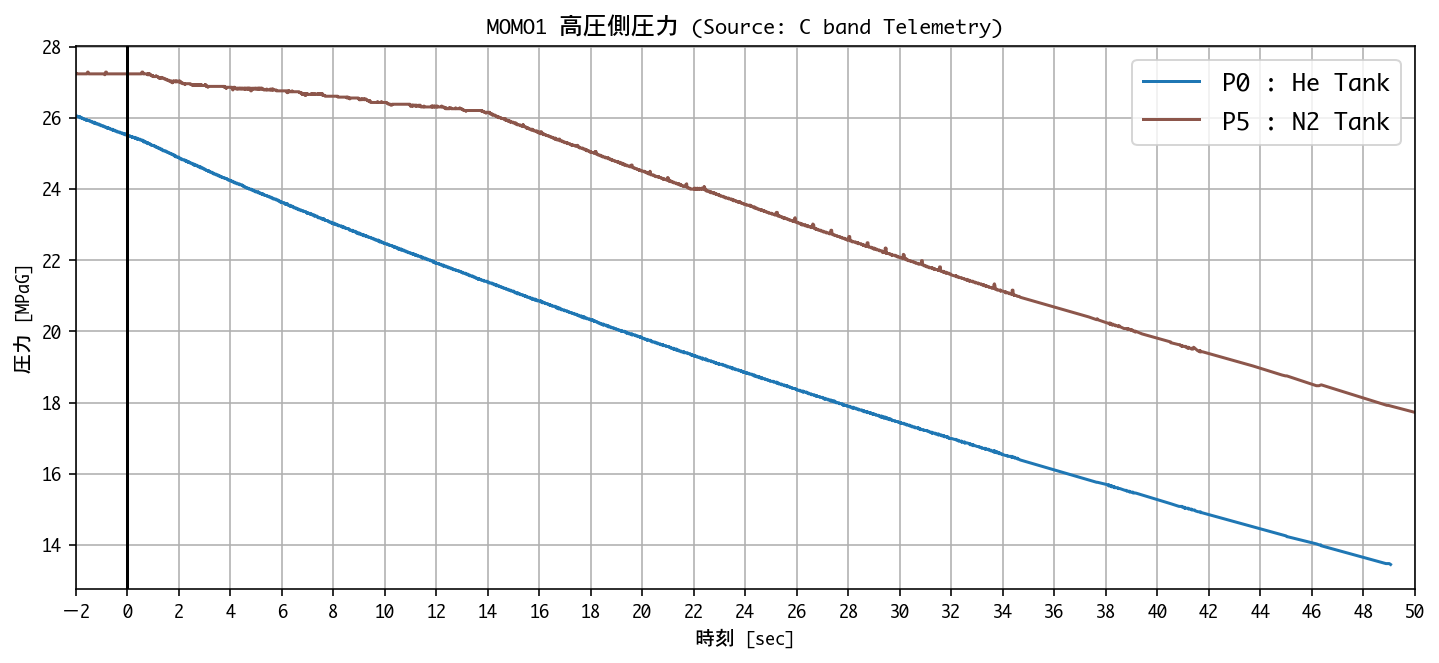

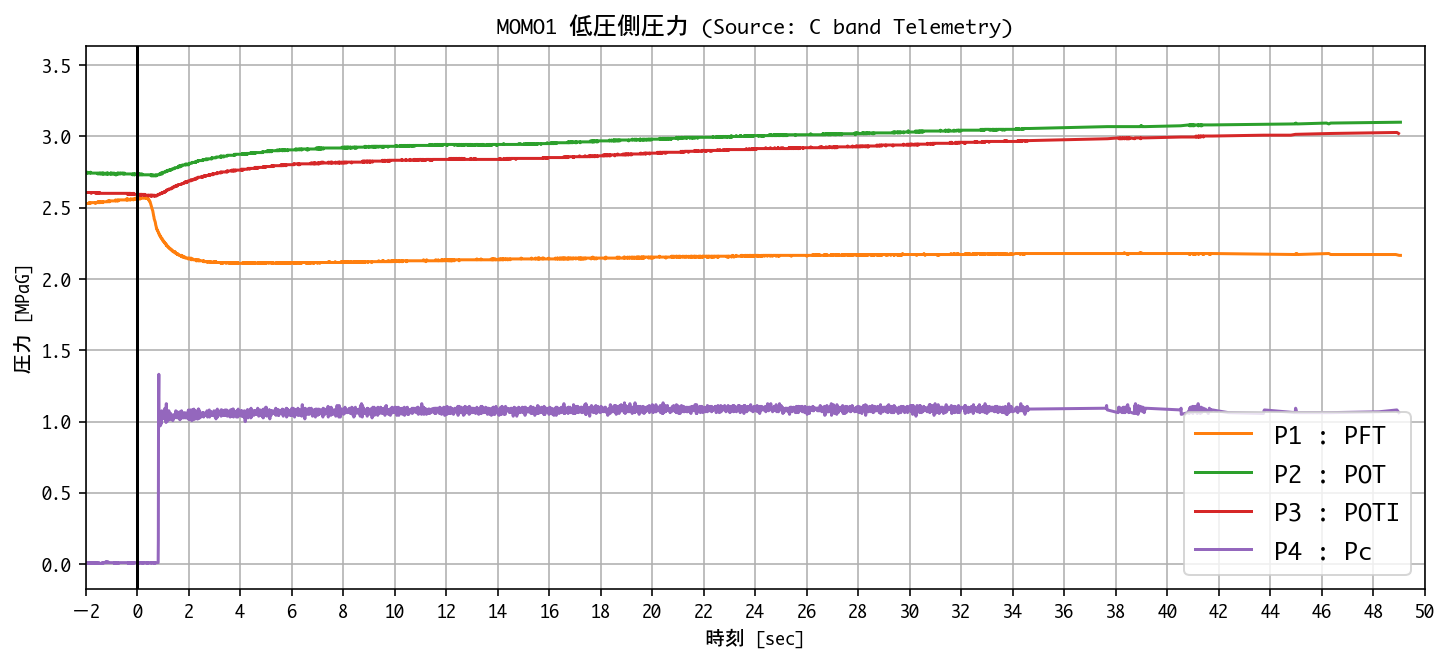

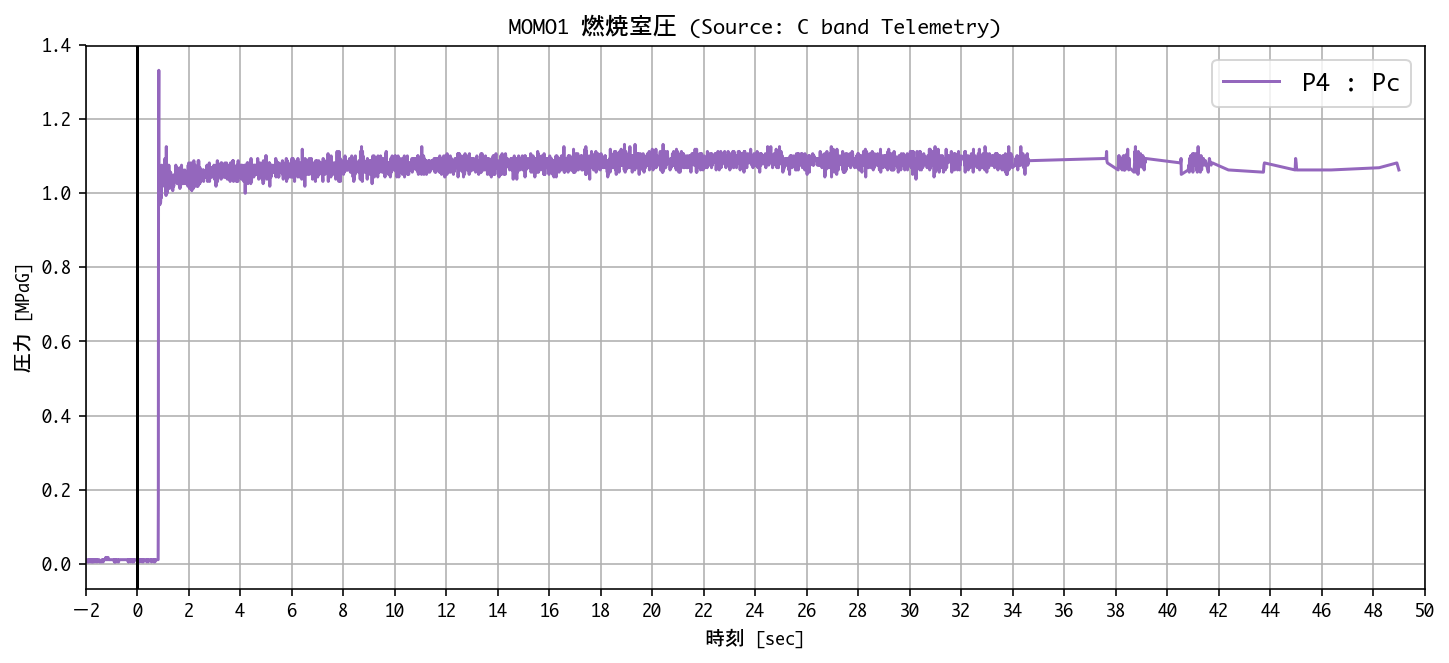

In [3]:
alpha = 1.0
plt.figure()
plt.plot(df_032["# T[s]"], df_032["P0[MPa]"], "-", color="C0", alpha=alpha, label="P0 : He Tank")
plt.plot(df_033["# T[s]"], df_033["P5[MPa]"], "-", color="C5", alpha=alpha, label="P5 : N2 Tank")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 高圧側圧力 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_high" + ".png")

alpha = 1.0
plt.figure()
# plt.plot(df_032["# T[s]"], df_032["P0[MPa]"], "-", alpha=alpha, label="P0 : He Tank")
plt.plot(df_032["# T[s]"], df_032["P1[MPa]"], "-", color="C1", alpha=alpha, label="P1 : PFT")
plt.plot(df_032["# T[s]"], df_032["P2[MPa]"], "-", color="C2", alpha=alpha, label="P2 : POT")
plt.plot(df_031["# T[s]"], df_031["P3[MPa]"], "-", color="C3", alpha=alpha, label="P3 : POTI")
plt.plot(df_030["# T[s]"], df_030["P4[MPa]"], "-", color="C4", alpha=alpha, label="P4 : Pc")
# plt.plot(df_033["# T[s]"], df_033["P5[MPa]"], "-", alpha=alpha, label="P5 : N2 Tank")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 低圧側圧力 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure" + ".png")

plt.figure()
plt.plot(df_030["# T[s]"], df_030["P4[MPa]"], "-", color="C4", alpha=alpha, label="P4 : Pc")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 燃焼室圧 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_Pc" + ".png")

## 加速度・ジャイロ

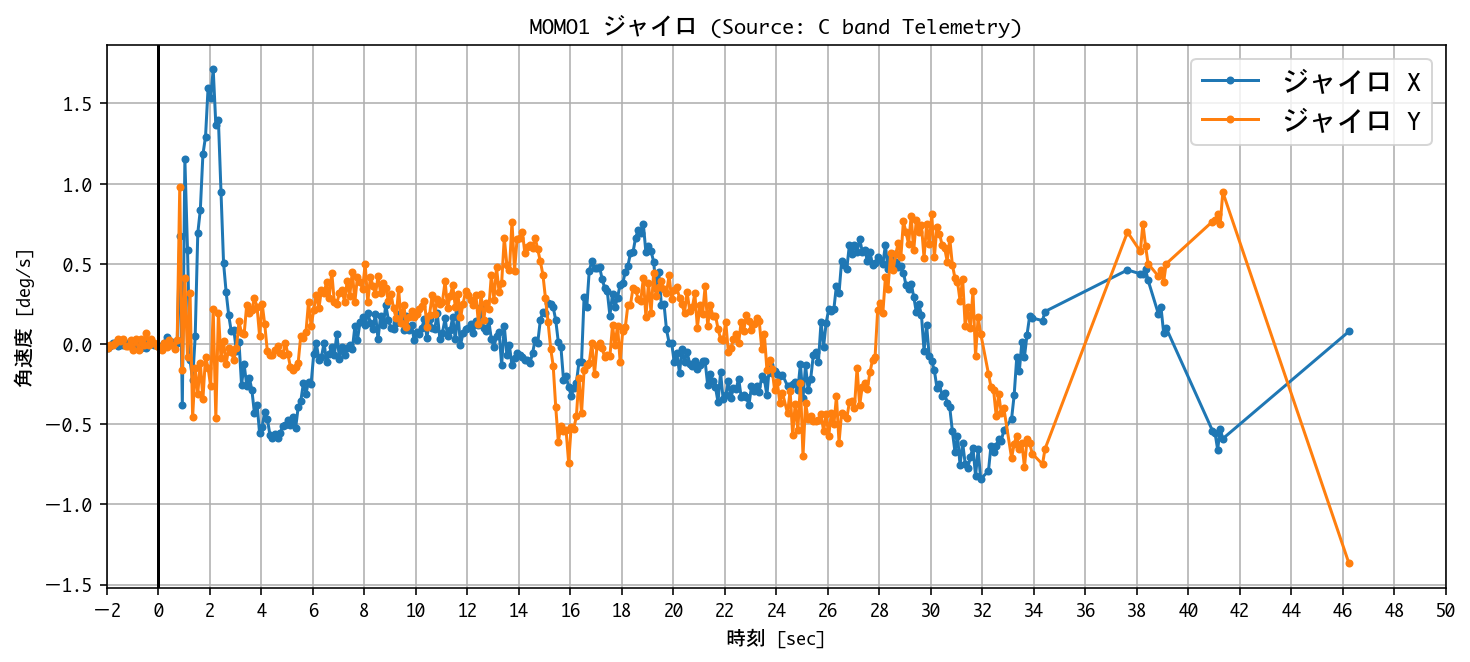

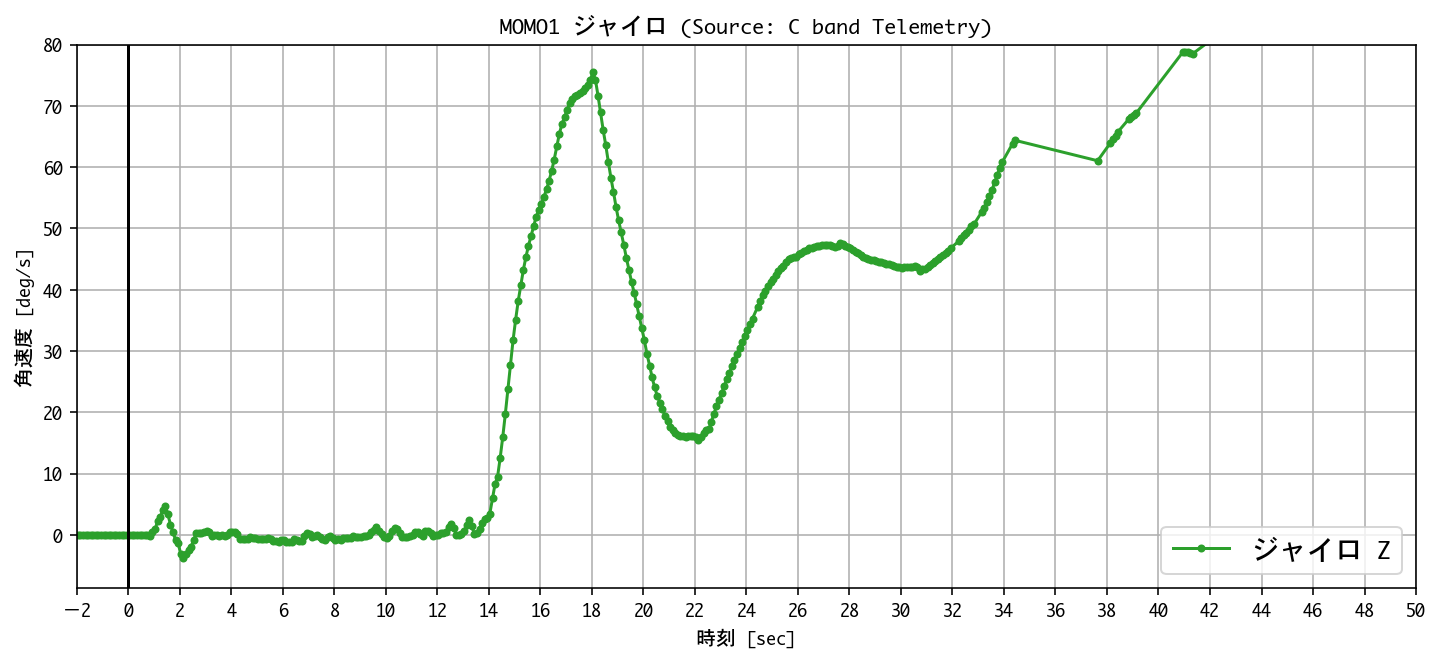

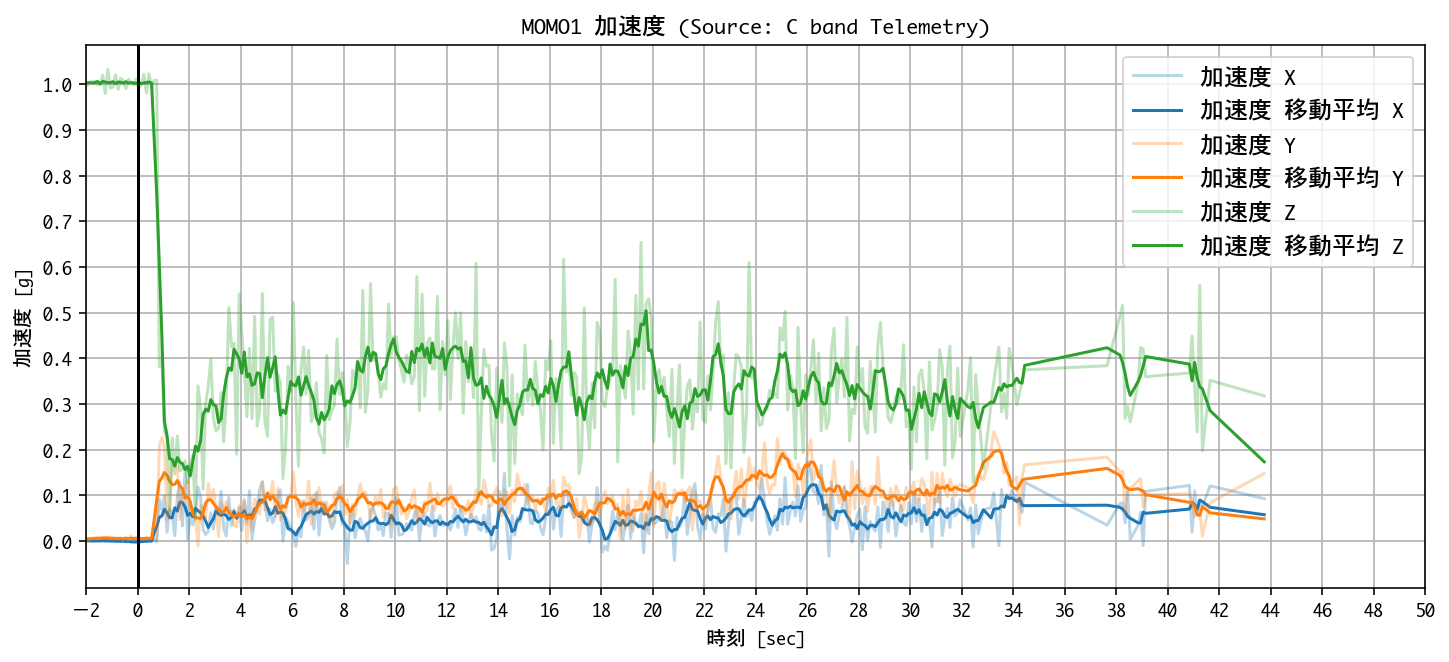

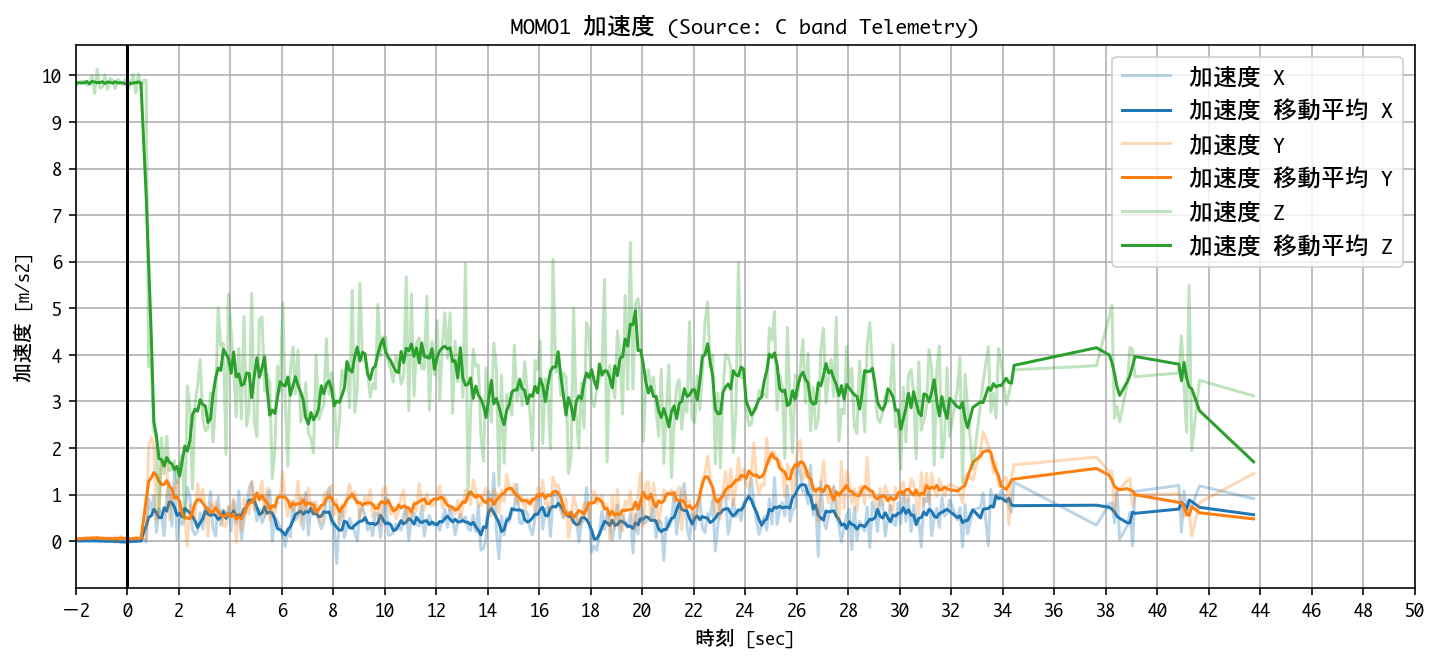

In [4]:
alpha = 1.0
plt.figure()
plt.plot(df_130["# T[s]"], df_130["wx[dps]"], "C0.-", alpha=alpha, label="ジャイロ X")
plt.plot(df_130["# T[s]"], df_130["wy[dps]"], "C1.-", alpha=alpha, label="ジャイロ Y")
# plt.plot(df_130["# T[s]"], df_130["wz[dps]"], ".-", alpha=alpha, label="ジャイロ Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロ " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [deg/s]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gyro_XY" + ".png")

alpha = 1.0
plt.figure()
# plt.plot(df_130["# T[s]"], df_130["wx[dps]"], ".-", alpha=alpha, label="ジャイロ X")
# plt.plot(df_130["# T[s]"], df_130["wy[dps]"], ".-", alpha=alpha, label="ジャイロ Y")
plt.plot(df_130["# T[s]"], df_130["wz[dps]"], "C2.-", alpha=alpha, label="ジャイロ Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロ " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [deg/s]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim(ymax=80)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gyro_Z" + ".png")

#  加速度はノイズが多いので移動平均を作る
num=5 #移動平均の個数
b=np.ones(num)/num
ax_ma = np.convolve(df_131["ax[g]"], b, mode='same')
ay_ma = np.convolve(df_131["ay[g]"], b, mode='same')
az_ma = np.convolve(df_131["az[g]"], b, mode='same')

alpha = 0.3
plt.figure()
plt.plot(df_131["# T[s]"], df_131["ax[g]"], "C0-", alpha=alpha, label="加速度 X")
plt.plot(df_131["# T[s]"], ax_ma, "C0-", label="加速度 移動平均 X")
plt.plot(df_131["# T[s]"], df_131["ay[g]"], "C1-", alpha=alpha, label="加速度 Y")
plt.plot(df_131["# T[s]"], ay_ma, "C1-", label="加速度 移動平均 Y")
plt.plot(df_131["# T[s]"], df_131["az[g]"], "C2-", alpha=alpha, label="加速度 Z")
plt.plot(df_131["# T[s]"], az_ma, "C2-", label="加速度 移動平均 Z")
plt.grid()
plt.legend(fontsize=12)
plt.title("MOMO1 加速度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("加速度 [g]")
plt.xticks(np.arange(-2,52,2))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "accelaration_g" + ".png")

alpha = 0.3
g = 9.80665
plt.figure()
plt.plot(df_131["# T[s]"], df_131["ax[g]"]*g, "C0-", alpha=alpha, label="加速度 X")
plt.plot(df_131["# T[s]"], ax_ma*g, "C0-", label="加速度 移動平均 X")
plt.plot(df_131["# T[s]"], df_131["ay[g]"]*g, "C1-", alpha=alpha, label="加速度 Y")
plt.plot(df_131["# T[s]"], ay_ma*g, "C1-", label="加速度 移動平均 Y")
plt.plot(df_131["# T[s]"], df_131["az[g]"]*g, "C2-", alpha=alpha, label="加速度 Z")
plt.plot(df_131["# T[s]"], az_ma*g, "C2-", label="加速度 移動平均 Z")
plt.grid()
plt.legend(fontsize=12)
plt.title("MOMO1 加速度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("加速度 [m/s2]")
plt.xticks(np.arange(-2,52,2))
plt.yticks(np.arange(0,11,1))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "accelaration" + ".png")

## 気圧

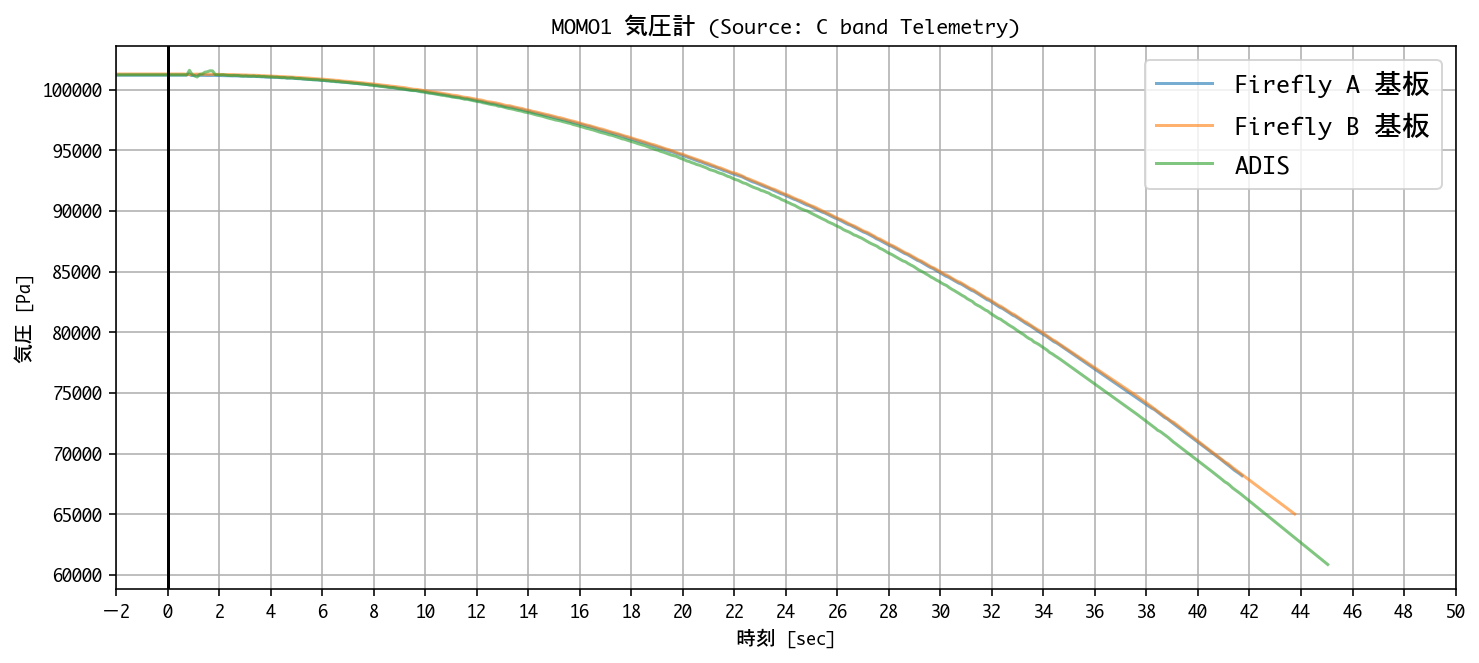

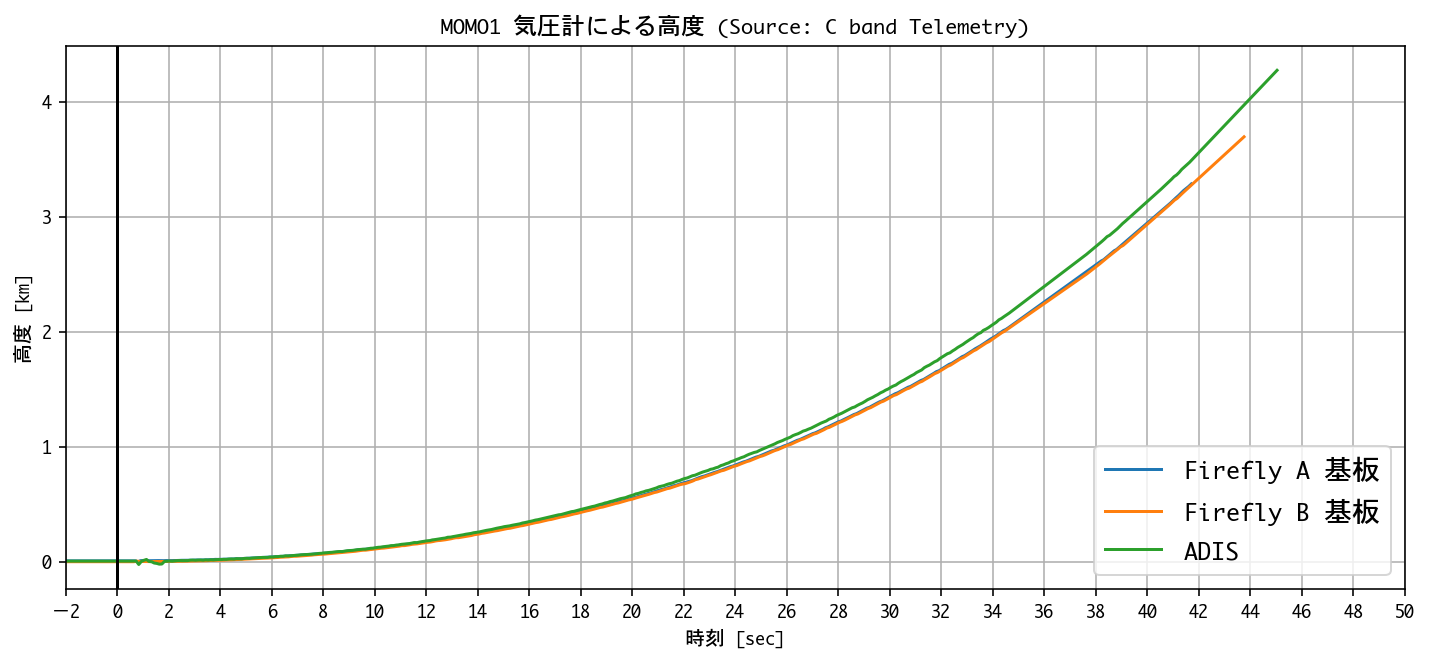

In [5]:
alpha = 0.6
plt.figure()
plt.plot(df_121["# T[s]"], df_121["barometer[Pa]"], "-", alpha=alpha, label="Firefly A 基板")
plt.plot(df_122["# T[s]"], df_122["barometer[Pa]"], "-", alpha=alpha, label="Firefly B 基板")
plt.plot(df_123["# T[s]"], df_123["barometer[Pa]"], "-", alpha=alpha, label="ADIS")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 気圧計 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("気圧 [Pa]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "barometer" + ".png")

# 気圧と高度の関係式
# http://keisan.casio.jp/exec/system/1257609530
P0 = 101300 # 海面高度での気圧[Pa]
T0 = 0 # その高度での温度[℃]
alt_A = ((P0/df_121["barometer[Pa]"])**(1/5.257) - 1) * (T0 + 273.15) / 0.0065
alt_B = ((P0/df_122["barometer[Pa]"])**(1/5.257) - 1) * (T0 + 273.15) / 0.0065
alt_ADIS = ((P0/df_123["barometer[Pa]"])**(1/5.257) - 1) * (T0 + 273.15) / 0.0065

plt.figure()
plt.plot(df_121["# T[s]"], alt_A / 1000, label="Firefly A 基板")
plt.plot(df_122["# T[s]"], alt_B / 1000, label="Firefly B 基板")
plt.plot(df_123["# T[s]"], alt_ADIS / 1000, label="ADIS")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 気圧計による高度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("高度 [km]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "altitude_by_barometer" + ".png")

## クォータニオン

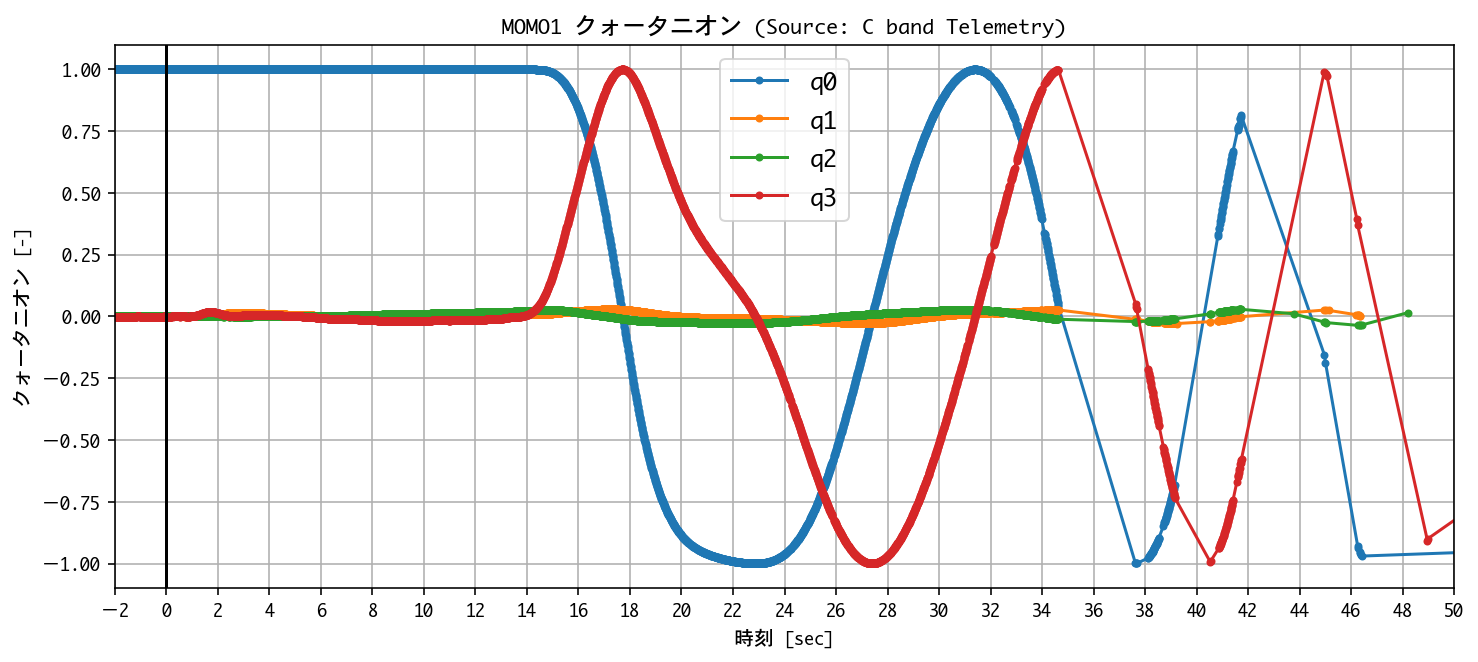

In [6]:
alpha = 1.0
plt.figure()
plt.plot(df_004["# T[s]"], df_004["q0"], ".-", alpha = alpha, label="q0")
plt.plot(df_005["# T[s]"], df_005["q1"], ".-", alpha = alpha, label="q1")
plt.plot(df_006["# T[s]"], df_006["q2"], ".-", alpha = alpha, label="q2")
plt.plot(df_007["# T[s]"], df_007["q3"], ".-", alpha = alpha, label="q3")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 クォータニオン " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("クォータニオン [-]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "quaternion" + ".png")

## 姿勢（機軸の向き）

In [7]:
# 指令角度を読み込み
df_a = pd.read_csv("../csv/etc/attitude_plan_nominal.csv")

time = np.arange(-3, 46, 0.01)
df_q = pd.DataFrame()
df_q["# T[s]"] = time
q0_f = interpolate.interp1d(df_004["# T[s]"], df_004["q0"])
q1_f = interpolate.interp1d(df_005["# T[s]"], df_005["q1"])
q2_f = interpolate.interp1d(df_006["# T[s]"], df_006["q2"])
q3_f = interpolate.interp1d(df_007["# T[s]"], df_007["q3"])

q0 = q0_f(time)
q1 = q1_f(time)
q2 = q2_f(time)
q3 = q3_f(time)


# 機体のAZ,ELを計算
body_vec_x = np.zeros(0)
body_vec_y = np.zeros(0)
body_vec_z = np.zeros(0)
for i in range(len(q0)):
    qBL = np.quaternion(q0[i], q1[i], q2[i], q3[i])
    q = qBL * np.quaternion(0,0,0,1) * qBL.conj()
    body_vec_x = np.append(body_vec_x, q.x)
    body_vec_y = np.append(body_vec_y, q.y)
    body_vec_z = np.append(body_vec_z, q.z)
body_vec_xy = np.sqrt(body_vec_x**2 + body_vec_y**2)
df_q["elevation_body[deg]"] = rad2deg(np.arctan2(body_vec_z, body_vec_xy))
body_vec_y[body_vec_x<0.01] = -0.4226
body_vec_x[body_vec_x<0.01] = 0.9063  # バタつき防止
df_q["azimuth_body[deg]"] = rad2deg(np.arctan2(body_vec_x, body_vec_y))

# 機体のロール角を計算
body_vec_x = np.zeros(0)
body_vec_y = np.zeros(0)
body_vec_z = np.zeros(0)
for i in range(len(q0)):
    qBL = np.quaternion(q0[i], q1[i], q2[i], q3[i])
    q = qBL * np.quaternion(0,1,0,0) * qBL.conj()
    body_vec_x = np.append(body_vec_x, q.x)
    body_vec_y = np.append(body_vec_y, q.y)
    body_vec_z = np.append(body_vec_z, q.z)
df_q["roll_body[deg]"] = rad2deg(np.arctan2(body_vec_y, body_vec_x))


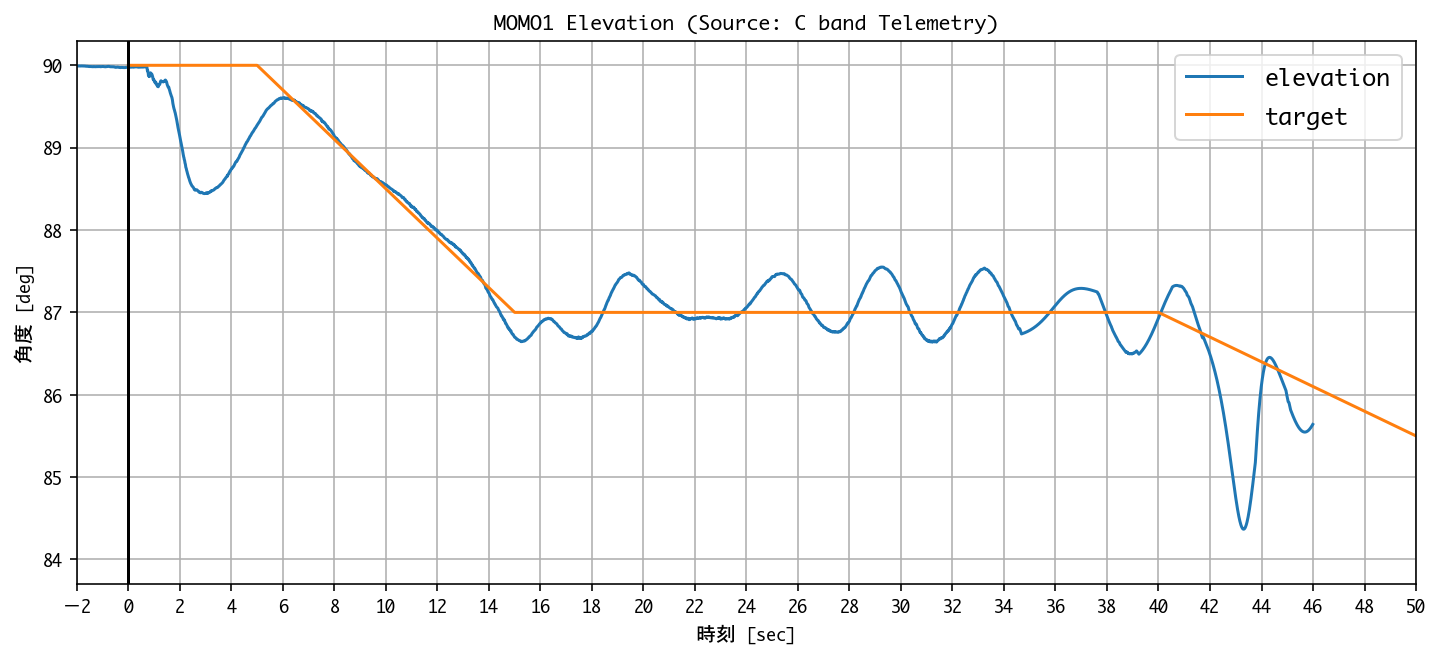

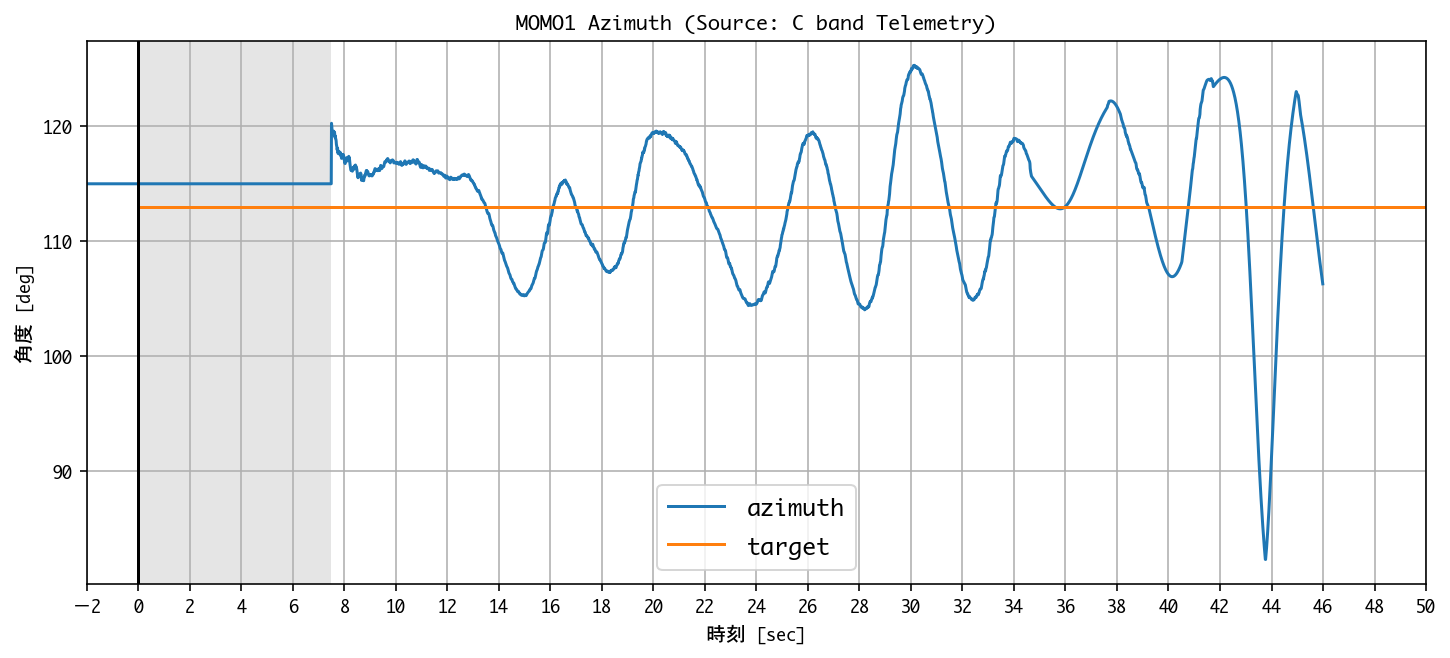

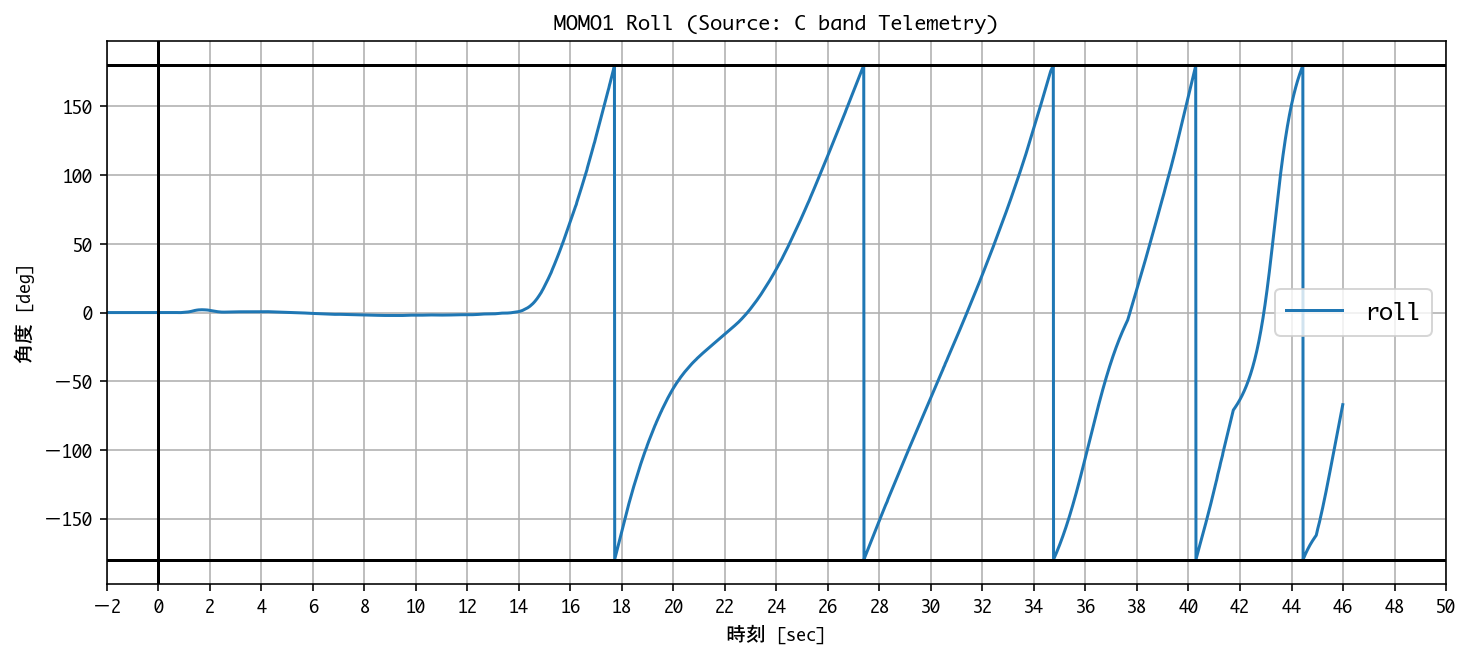

In [8]:
plt.figure()
plt.plot(df_q["# T[s]"], df_q["elevation_body[deg]"], label="elevation")
plt.plot(df_a["time"], df_a["elevation"], label="target")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Elevation " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "elevation" + ".png")

plt.figure()
plt.plot(df_q["# T[s]"], df_q["azimuth_body[deg]"], label="azimuth")
plt.plot(df_a["time"], df_a["azimth"], label="target")
plt.axvspan(0, 7.5, facecolor='0.5', alpha=0.2)
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Azimuth " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "azimuth" + ".png")

plt.figure()
plt.plot(df_q["# T[s]"], df_q["roll_body[deg]"], label="roll")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Roll " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.axhline(y=-180, color="k")
plt.axhline(y=180, color="k")
plt.savefig(savename + "roll" + ".png")

## ジンバル

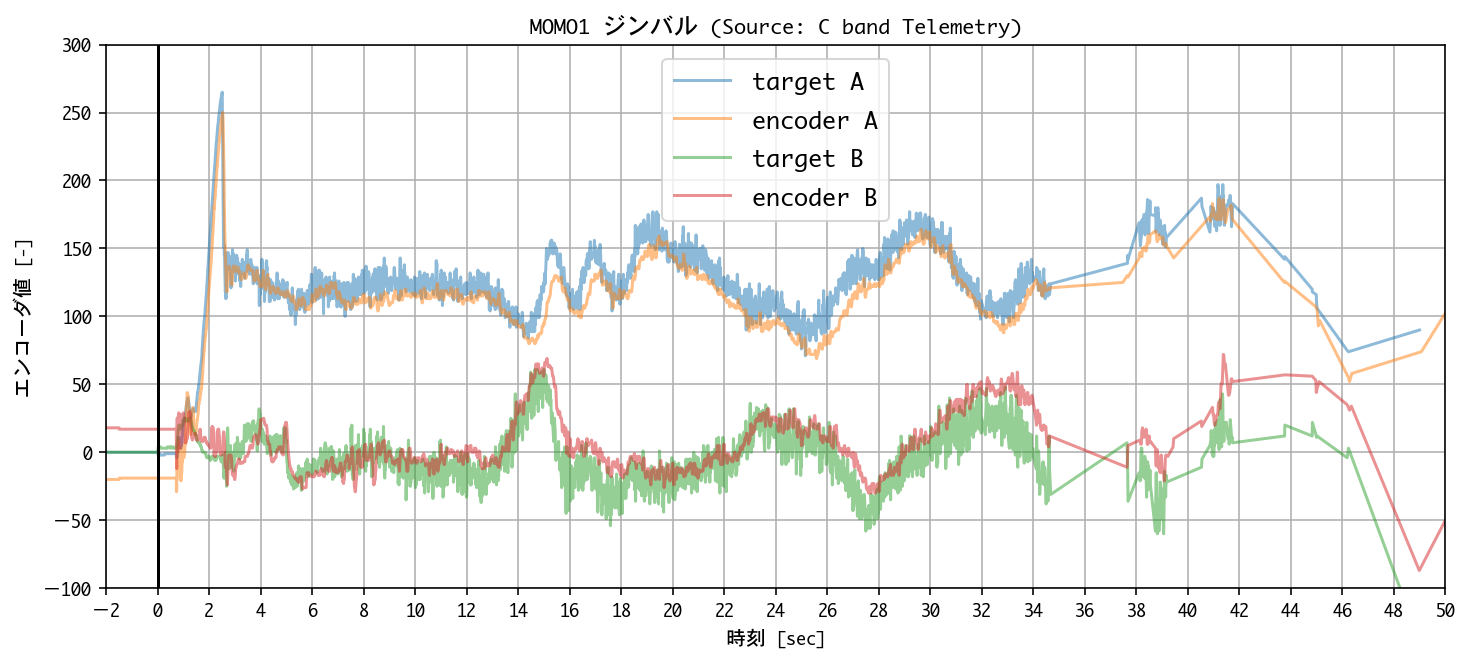

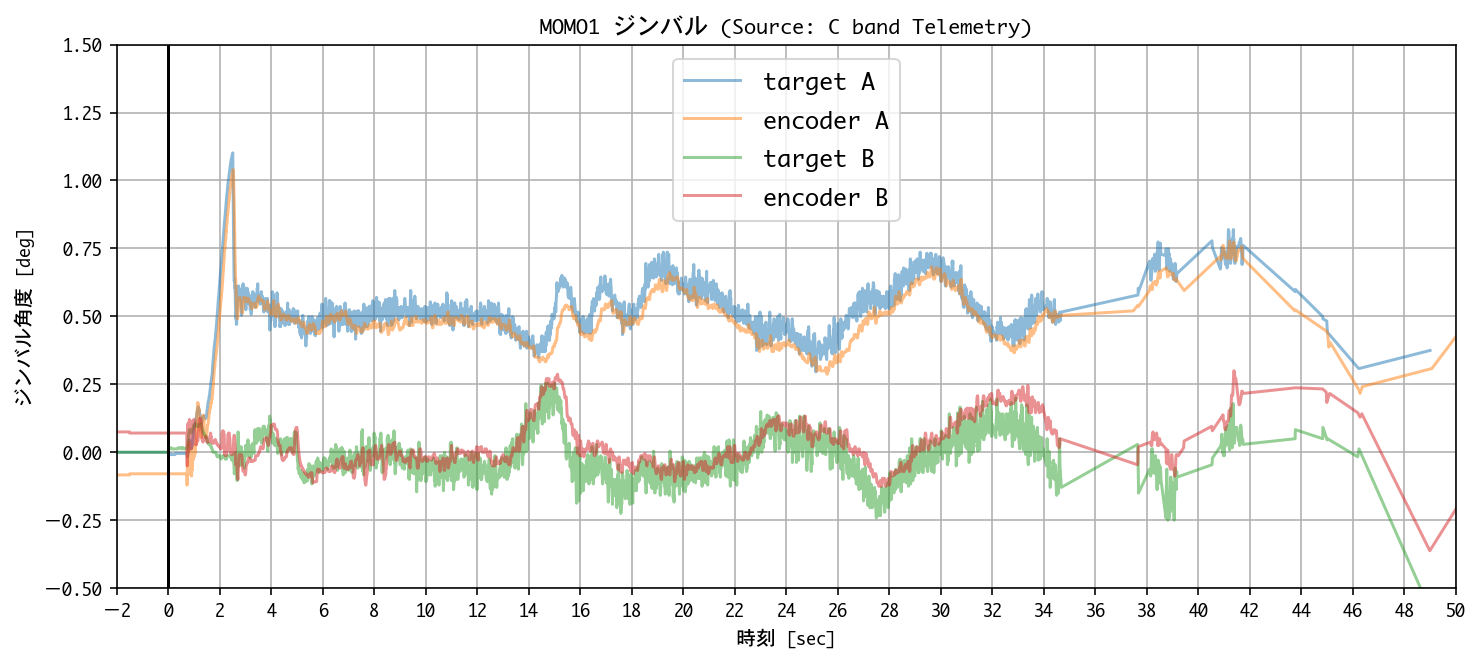

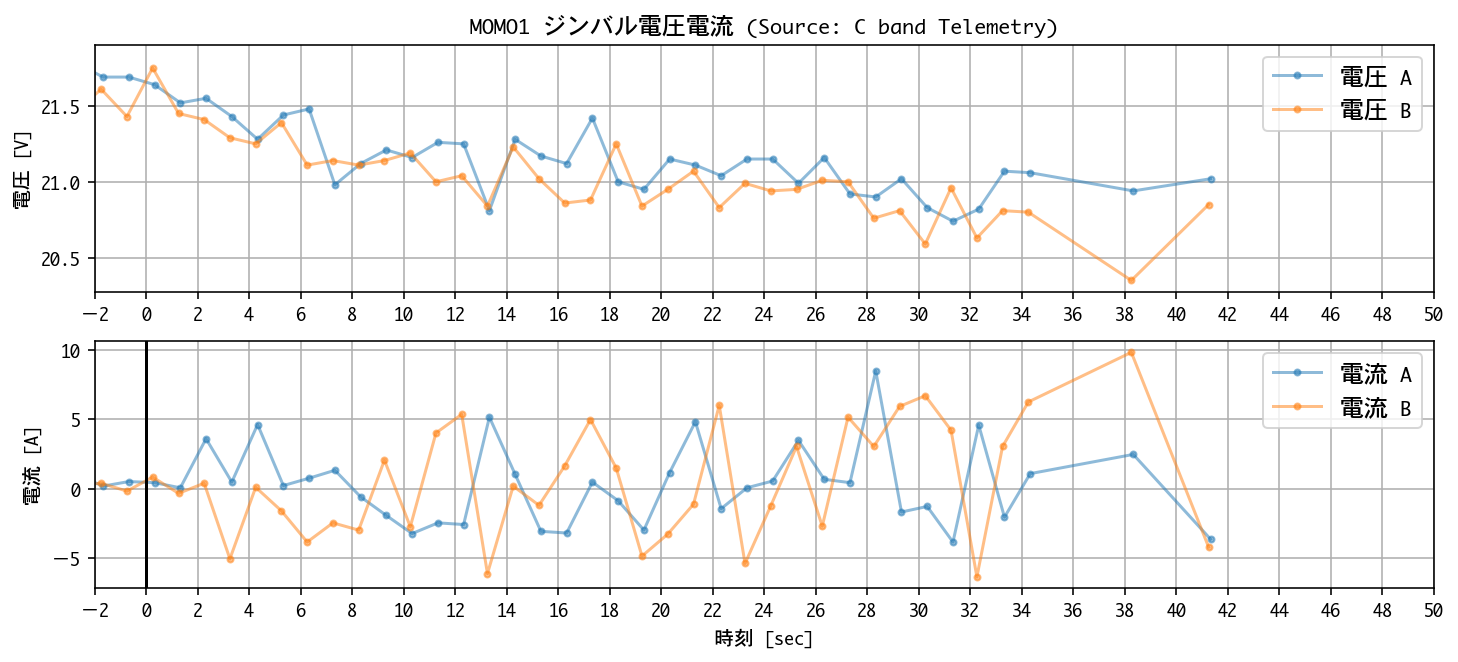

In [9]:
df_enc2deg = pd.read_csv("../csv/etc/enc2deg.csv")

enc2deg_f = interpolate.interp1d(df_enc2deg["enc"], df_enc2deg["gimbal[deg]"])
df_008["target_a[deg]"] = enc2deg_f(df_008["gimbal_a_target[enc]"])
df_01a["encoder_a[deg]"] = enc2deg_f(df_01a["encoder[enc]"])
df_008["target_b[deg]"] = enc2deg_f(df_008["gimbal_b_target[enc]"])
df_01b["encoder_b[deg]"] = enc2deg_f(df_01b["encoder[enc]"])

alpha = 0.5
plt.figure()
plt.plot(df_008["# T[s]"], df_008["gimbal_a_target[enc]"], "-", alpha=alpha, label="target A")
plt.plot(df_01a["# T[s]"], df_01a["encoder[enc]"], "-", alpha=alpha, label="encoder A")
plt.plot(df_008["# T[s]"], df_008["gimbal_b_target[enc]"], "-", alpha=alpha, label="target B")
plt.plot(df_01b["# T[s]"], df_01b["encoder[enc]"], "-", alpha=alpha, label="encoder B")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジンバル " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("エンコーダ値 [-]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gimbal_enc" + ".png")

plt.figure()
plt.plot(df_008["# T[s]"], df_008["target_a[deg]"], "-", alpha=alpha, label="target A")
plt.plot(df_01a["# T[s]"], df_01a["encoder_a[deg]"], "-", alpha=alpha, label="encoder A")
plt.plot(df_008["# T[s]"], df_008["target_b[deg]"], "-", alpha=alpha, label="target B")
plt.plot(df_01b["# T[s]"], df_01b["encoder_b[deg]"], "-", alpha=alpha, label="encoder B")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジンバル " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("ジンバル角度 [deg]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim([-0.5, 1.5])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gimbal_deg" + ".png")

plt.figure()
plt.subplot(2,1,1)
plt.plot(df_10a["# T[s]"], df_10a["power_v[V]"], ".-", alpha=alpha, label="電圧 A")
plt.plot(df_10b["# T[s]"], df_10b["power_v[V]"], ".-", alpha=alpha, label="電圧 B")
plt.grid()
plt.legend(fontsize=12)
plt.ylabel("電圧 [V]")
plt.title("MOMO1 ジンバル電圧電流 " + source_txt)
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.subplot(2,1,2)
plt.plot(df_10a["# T[s]"], df_10a["power_a[A]"], ".-", alpha=alpha, label="電流 A")
plt.plot(df_10b["# T[s]"], df_10b["power_a[A]"], ".-", alpha=alpha, label="電流 B")
plt.grid()
plt.legend(fontsize=12)
plt.xlabel("時刻 [sec]")
plt.ylabel("電流 [A]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gimbal_battery" + ".png")

## コールドガスジェット
ロール制御のために窒素ガスをノズル付きで噴射するコールドガスジェットを装備。

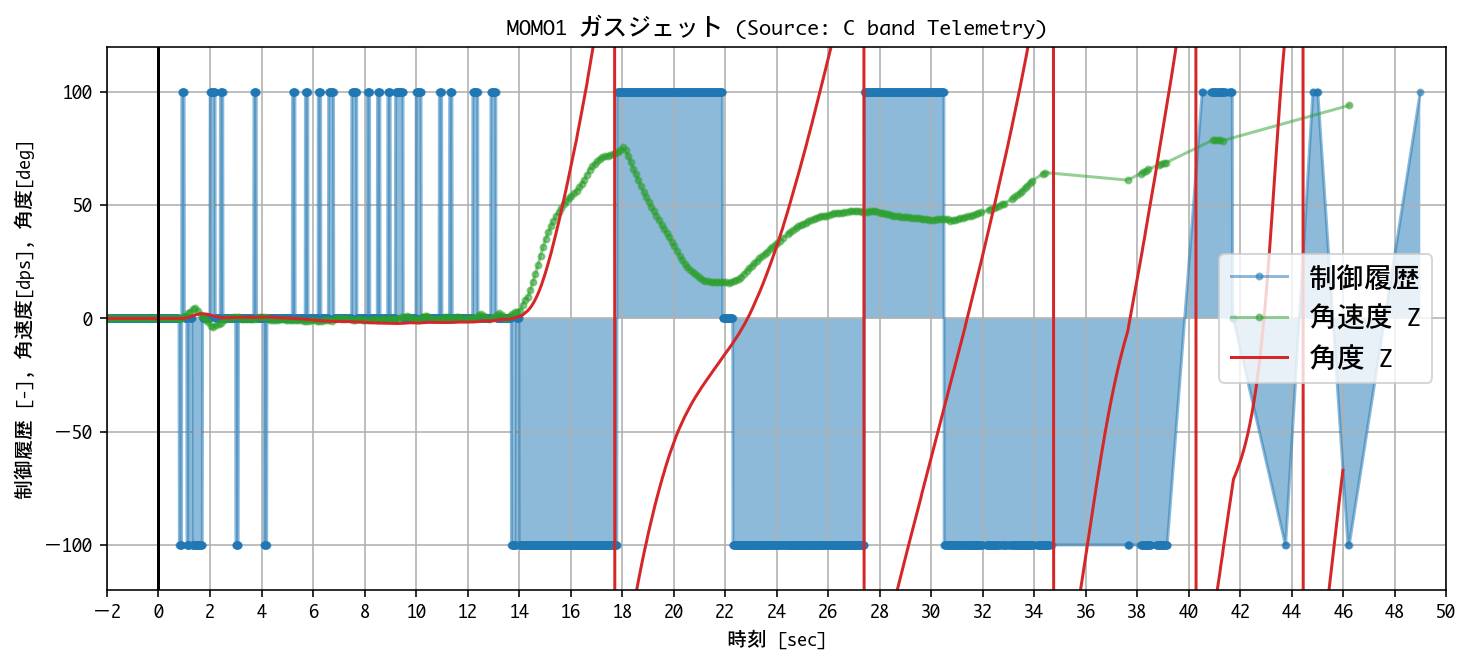

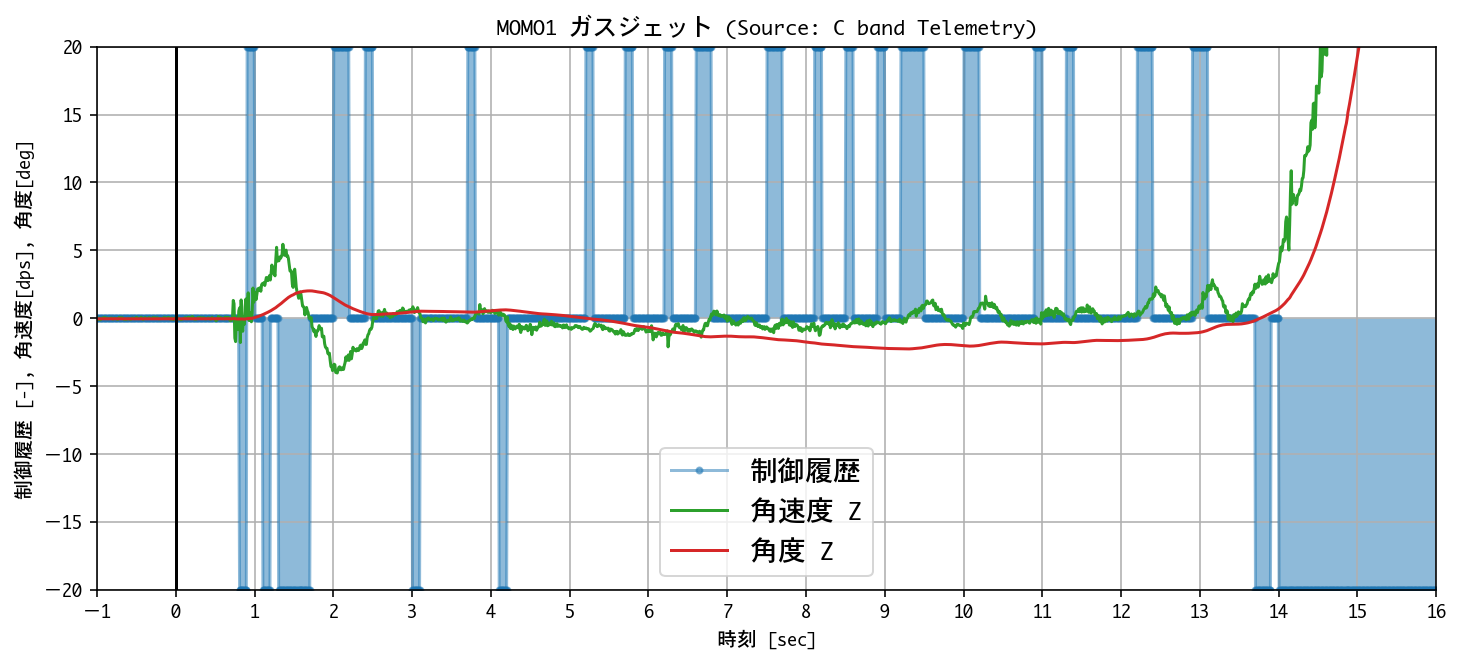

In [10]:
df_q["roll_gyro[dps]"] = df_q["roll_body[deg]"].diff() / 0.01

#  CW,CCWを置換
df_gasjet = df_008.replace(1, -1)
df_gasjet = df_gasjet.replace(2, 1)
df_sensor = pd.read_csv("../csv/telem1/telem1_sensors.csv")

alpha = 0.5
plt.figure()
plt.plot(df_008["# T[s]"], df_gasjet["gasjet"] * 100, ".-", alpha=alpha, label="制御履歴")
plt.fill_between(df_008["# T[s]"], df_gasjet["gasjet"] * 100, 0,facecolor='C0',alpha=0.5)
plt.plot(df_130["# T[s]"], df_130["wz[dps]"], "C2.-", alpha=alpha, label="角速度 Z")
plt.plot(df_q["# T[s]"], df_q["roll_body[deg]"], "C3-", label="角度 Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ガスジェット " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("制御履歴 [-], 角速度[dps], 角度[deg]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim([-120,120])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gasjet" + ".png")

plt.figure()
plt.plot(df_008["# T[s]"], df_gasjet["gasjet"] * 20, ".-", alpha=alpha, label="制御履歴")
plt.fill_between(df_008["# T[s]"], df_gasjet["gasjet"] * 20, 0,facecolor='C0',alpha=0.5)
plt.plot(df_q["# T[s]"], df_q["roll_gyro[dps]"], "C2-", label="角速度 Z")
plt.plot(df_q["# T[s]"], df_q["roll_body[deg]"], "C3-", label="角度 Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ガスジェット " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("制御履歴 [-], 角速度[dps], 角度[deg]")
plt.xticks(np.arange(-1,17,1))
plt.xlim([-1, 16])
plt.ylim([-20,20])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gasjet_detail" + ".png")

## ロールに関する角速度・角加速度・外乱の推定

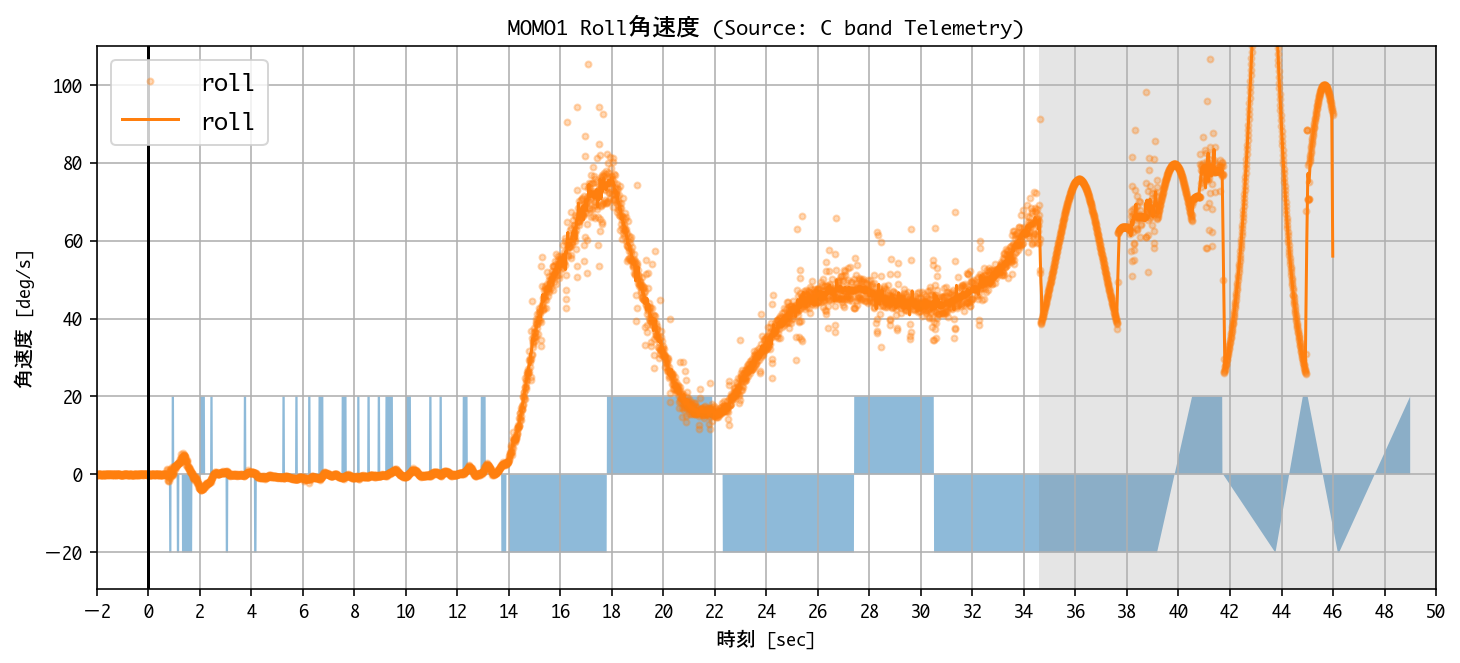

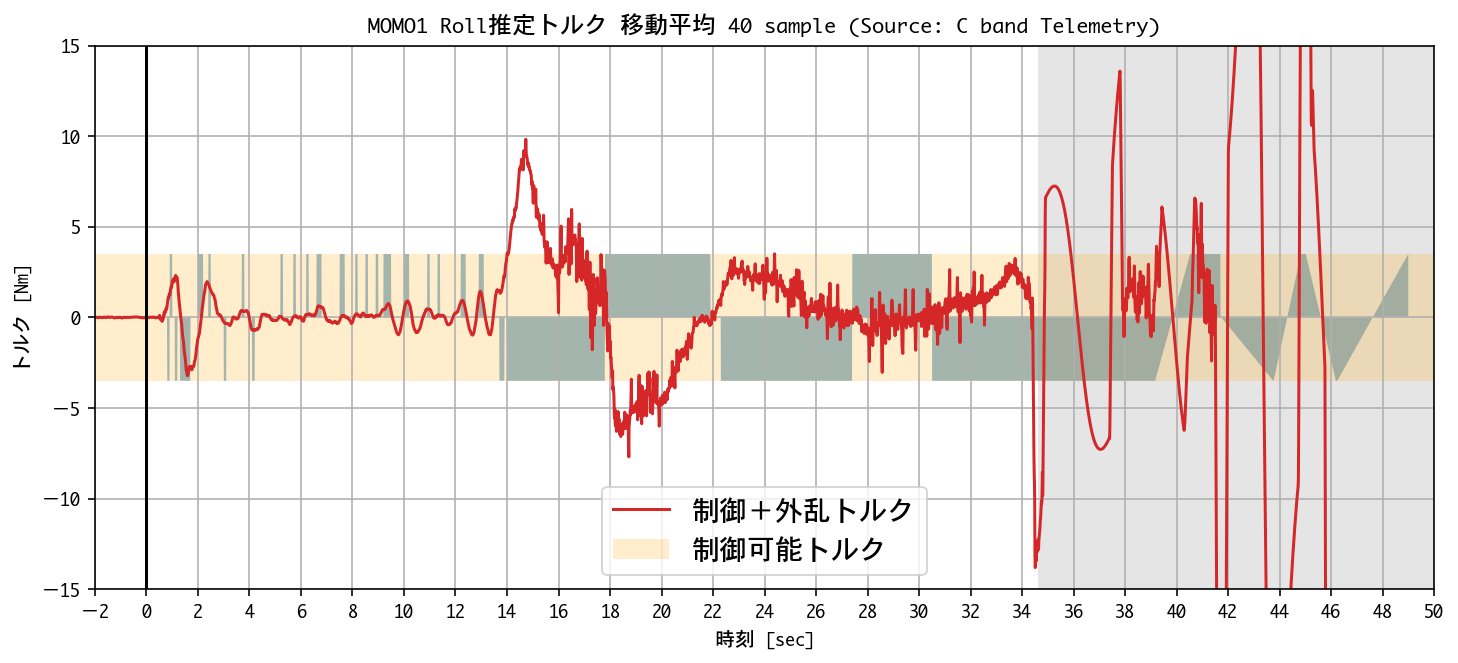

In [11]:
# 微分値を作ってから移動平均
delta_t = df_q["# T[s]"].diff()
# delta_t = delta_t.where(delta_t > 0.005, 0.001)
roll_gyro = df_q["roll_body[deg]"].diff() / delta_t

roll_gyro = roll_gyro.where(roll_gyro >  -100, np.nan)
roll_gyro = roll_gyro.fillna(method="bfill")

num = 10 #移動平均の個数
b = np.ones(num) / num
roll_gyro_ma = np.convolve(roll_gyro, b, mode='same')#移動平均
roll_gyro_ma = pd.Series(roll_gyro_ma)

Izz = 13
delta_t = df_q["# T[s]"].diff()
delta_t[1] = 0
roll_force = np.deg2rad(roll_gyro_ma.diff() / delta_t)  * Izz
num = 40
b = np.ones(num) / num
roll_force_ma = np.convolve(roll_force, b, mode='same')#移動平均
roll_gyro_ma = pd.Series(roll_gyro_ma)

# ガスジェットの履歴を補間
gasjet_f = interpolate.interp1d(df_008["# T[s]"], df_gasjet["gasjet"])
gasjet_on = gasjet_f(df_q["# T[s]"])


plt.figure()
plt.plot(df_q["# T[s]"], roll_gyro, "C1.", alpha = 0.3, label="roll")
plt.plot(df_q["# T[s]"], roll_gyro_ma, "C1", label="roll")
plt.fill_between(df_008["# T[s]"], df_gasjet["gasjet"] * 20, 0,facecolor='C0',alpha=0.5)
plt.axvspan(34.6, 50, facecolor='0.5', alpha=0.2)
plt.grid()
plt.title("MOMO1 Roll角速度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [deg/s]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim(ymax=110)
plt.axvline(x=0, color="k")
plt.legend(loc = "upper left", fontsize=14)
plt.savefig(savename + "roll_gyro" + ".png")

plt.figure()
# plt.plot(df_q["# T[s]"], roll_force, "C3", label="roll")
plt.plot(df_q["# T[s]"], roll_force_ma, "C3", label="制御＋外乱トルク")
plt.fill_between(df_008["# T[s]"], df_gasjet["gasjet"] * 3.5, 0,facecolor='C0',alpha=0.5)
# plt.plot(df_q["# T[s]"], roll_force_ma + gasjet_on * 3.5, "C5", label="制御トルクを引いた外乱")
plt.axvspan(34.6, 50, facecolor='0.5', alpha=0.2)
plt.axhspan(-3.5, 3.5, facecolor="orange", alpha = 0.2, label="制御可能トルク")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Roll推定トルク 移動平均 %d sample " % (num) + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("トルク [Nm]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim([-15, 15])
plt.axvline(x=0, color="k")
plt.savefig(savename + "roll_torque" + ".png")

## 電圧

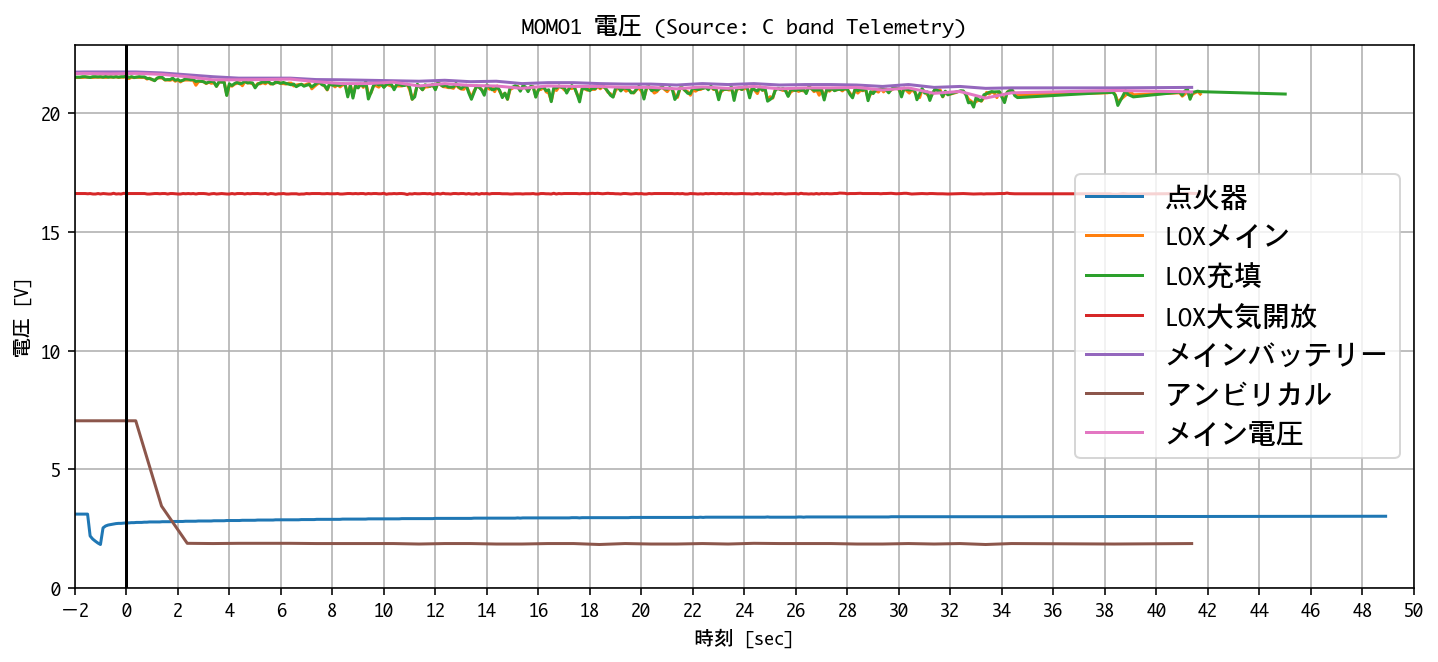

In [12]:
alpha = 1.0
plt.figure()
plt.plot(df_020["# T[s]"], df_020["batt_v[V]"], "-", alpha=alpha, label="点火器")
plt.plot(df_021["# T[s]"], df_021["power_v[V]"], "-", alpha=alpha, label="LOXメイン")
plt.plot(df_022["# T[s]"], df_022["power_v[V]"], "-", alpha=alpha, label="LOX充填")
plt.plot(df_023["# T[s]"], df_023["power_v[V]"], "-", alpha=alpha, label="LOX大気開放")
plt.plot(df_100["# T[s]"], df_100["batt_v[V]"], "-", alpha=alpha, label="メインバッテリー")
plt.plot(df_100["# T[s]"], df_100["unb_v[V]"], "-", alpha=alpha, label="アンビリカル")
plt.plot(df_100["# T[s]"], df_100["main_v[V]"], "-", alpha=alpha, label="メイン電圧")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 電圧 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("電圧 [V]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "avio_voltage" + ".png")

## 温度

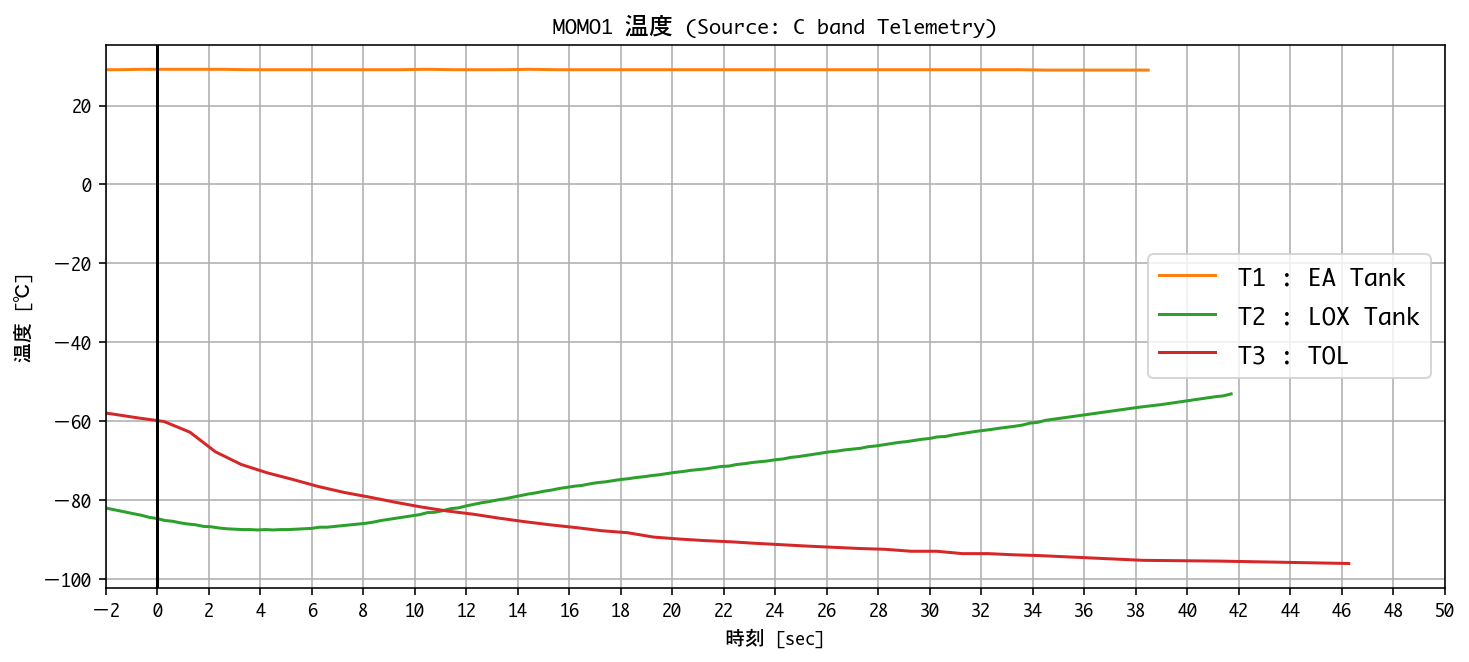

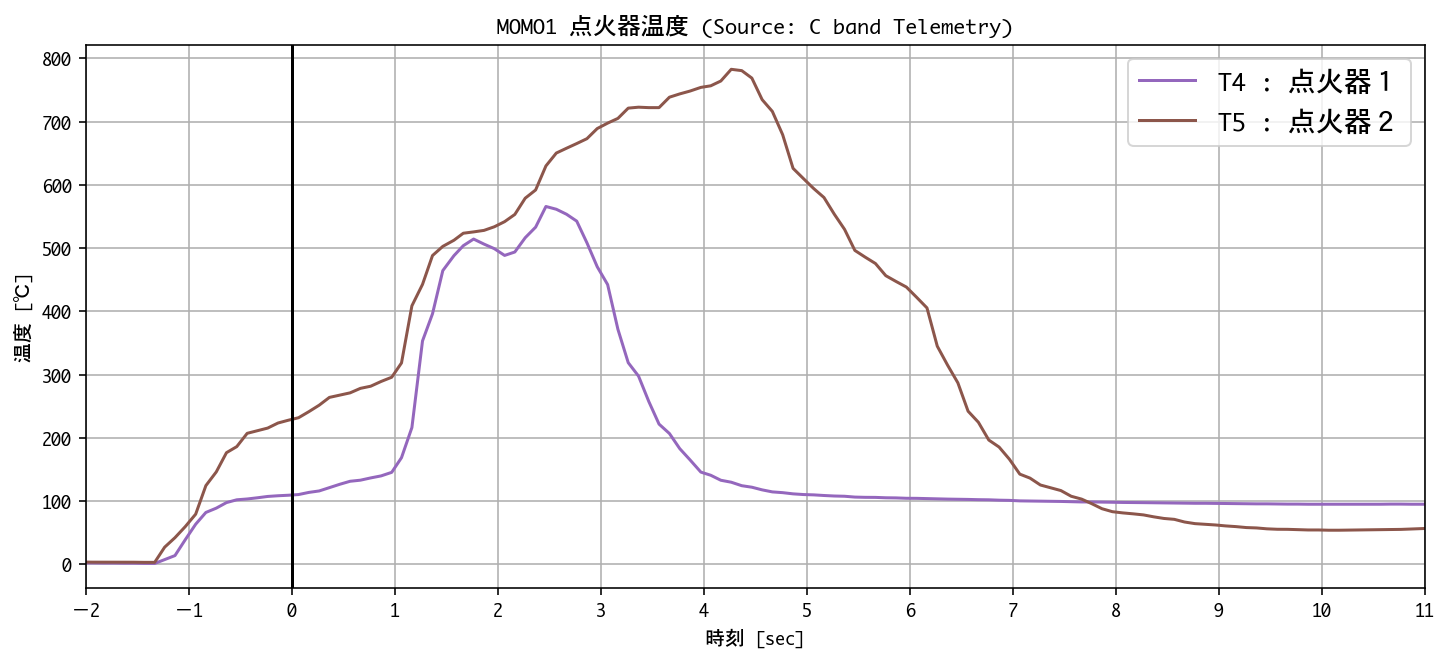

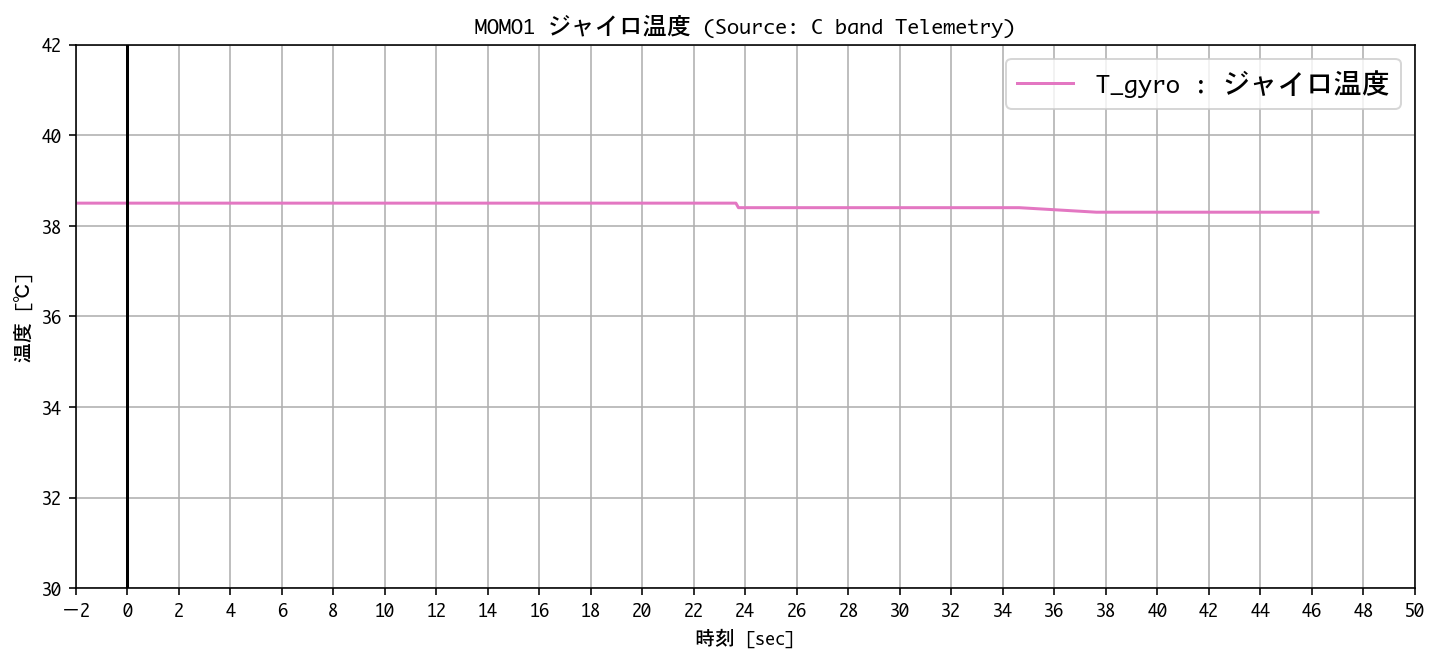

In [13]:
alpha = 1.0
plt.figure()
plt.plot(df_043["# T[s]"], df_043["T1[C]"], "-", color="C1", alpha=alpha, label="T1 : EA Tank")
plt.plot(df_042["# T[s]"], df_042["T2[C]"], "-", color="C2", alpha=alpha, label="T2 : LOX Tank")
plt.plot(df_040["# T[s]"], df_040["T3[C]"], "-", color="C3", alpha=alpha, label="T3 : TOL")
# plt.plot(df_041["# T[s]"], df_041["T4[C]"], "-", color="C4", alpha=alpha, label="T4 : ")
# plt.plot(df_041["# T[s]"], df_041["T5[C]"], "-", color="C5", alpha=alpha, label="T5 : ")
# plt.plot(df_045["# T[s]"], df_045["T_gyro[C]"], "-", color="C6", alpha=alpha, label="T_gyro : ")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 温度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("温度 [℃]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "temperature" + ".png")

alpha = 1.0
plt.figure()
plt.plot(df_041["# T[s]"], df_041["T4[C]"], "-", color="C4", alpha=alpha, label="T4 : 点火器１")
plt.plot(df_041["# T[s]"], df_041["T5[C]"], "-", color="C5", alpha=alpha, label="T5 : 点火器２")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 点火器温度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("温度 [℃]")
plt.xticks(np.arange(-2,12,1))
plt.xlim([-2, 11])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "temperature_ignitor" + ".png")

plt.figure()
plt.plot(df_045["# T[s]"], df_045["T_gyro[C]"], "-", color="C6", alpha=alpha, label="T_gyro : ジャイロ温度")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロ温度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("温度 [℃]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim([30, 42])
plt.axvline(x=0, color="k")
plt.savefig(savename + "temperature_gyro" + ".png")

## VHFテレメトリRSSI

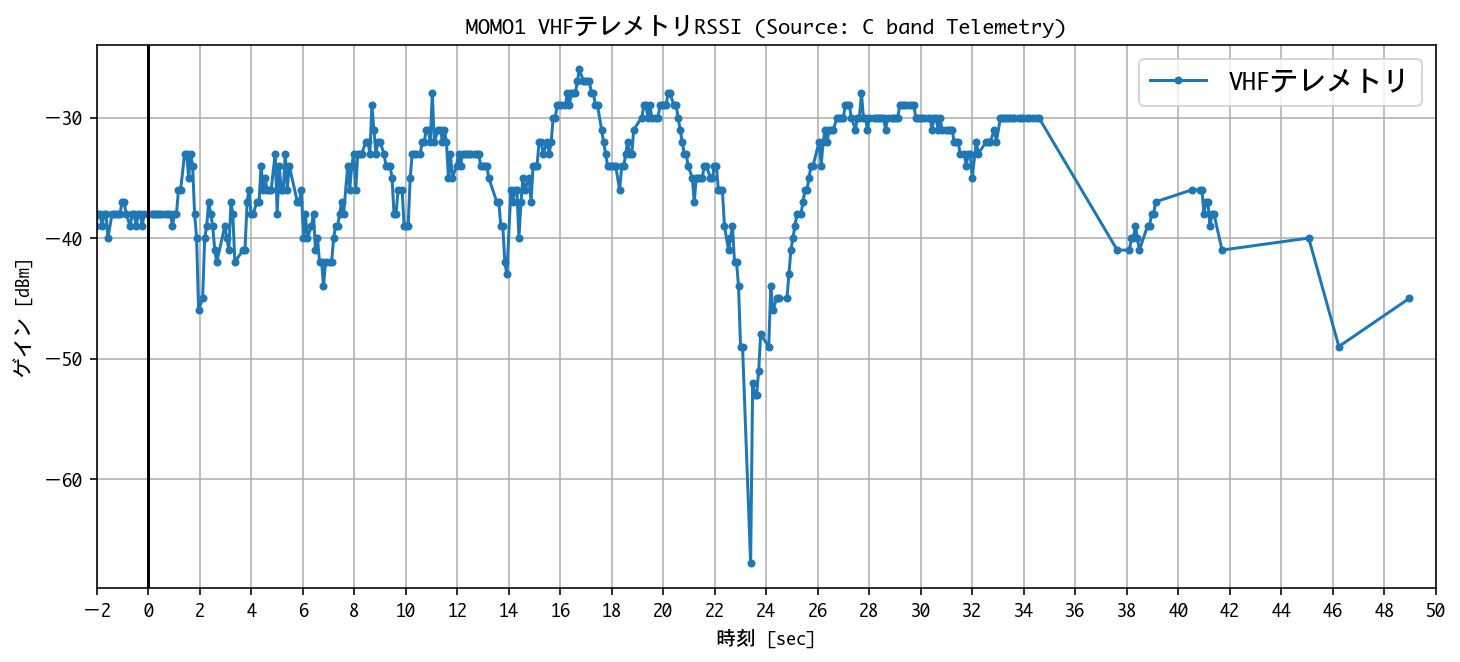

In [14]:
alpha = 1.0
plt.figure()
plt.plot(df_111["# T[s]"], df_111["RSSI[dBm]"], ".-", color="C0", alpha=alpha, label="VHFテレメトリ")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 VHFテレメトリRSSI " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("ゲイン [dBm]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "VHF_RSSI" + ".png")

## ジャイロのノイズ推定

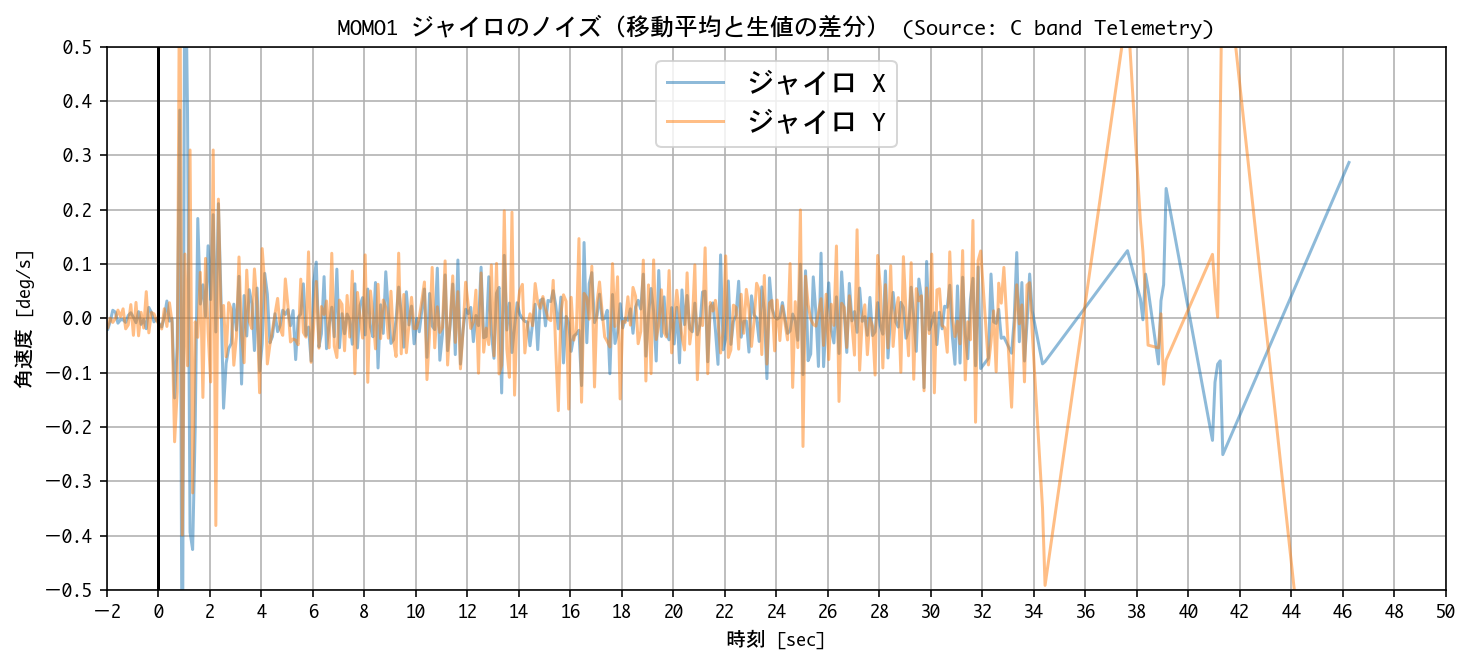

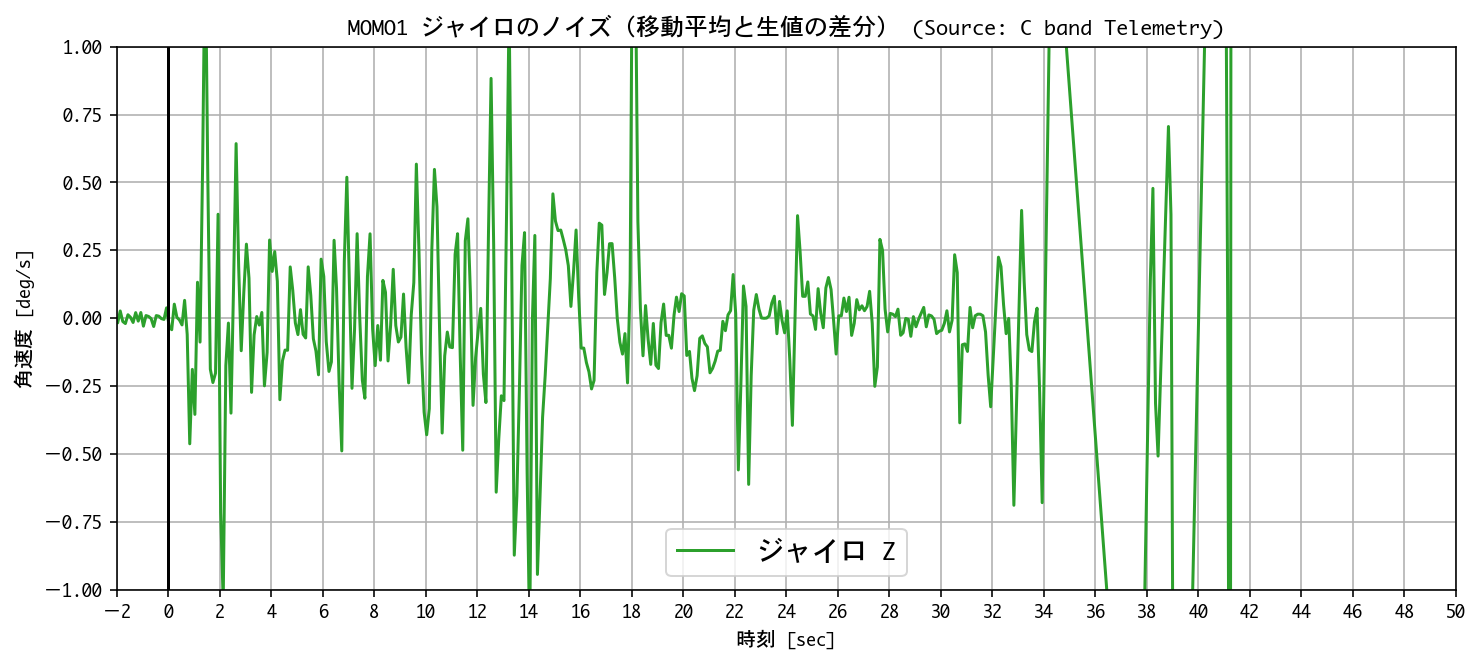

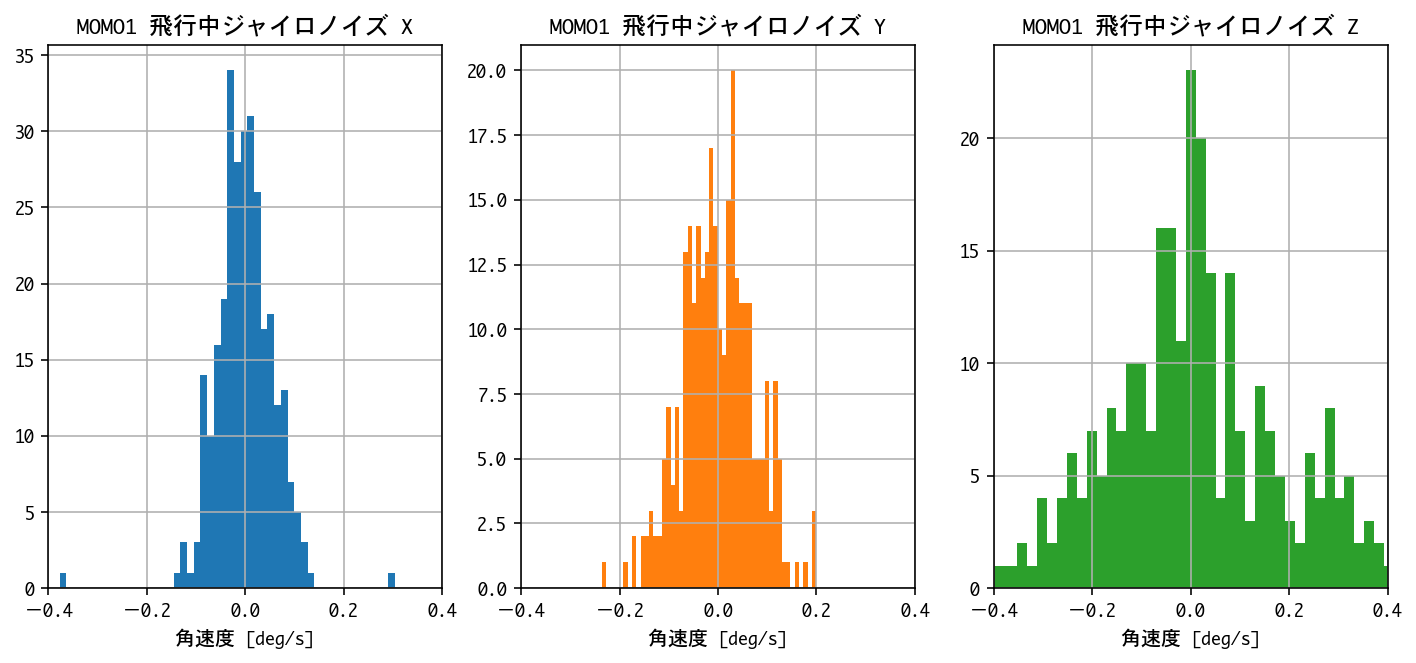

In [15]:
#  加速度はノイズだらけなのでT+0以降で移動平均を作る（_fはフライト時:T+2.5~32まで）
df_130["wx[dps]_f"] = df_130["wx[dps]"].where((df_130["# T[s]"]>2.5) & (df_130["# T[s]"]<32))
df_130["wy[dps]_f"] = df_130["wy[dps]"].where((df_130["# T[s]"]>2.5) & (df_130["# T[s]"]<32))
df_130["wz[dps]_f"] = df_130["wz[dps]"].where((df_130["# T[s]"]>2.5) & (df_130["# T[s]"]<32))

num=5 #移動平均の個数
b=np.ones(num)/num
gx_ma = np.convolve(df_130["wx[dps]"], b, mode='same')
gy_ma = np.convolve(df_130["wy[dps]"], b, mode='same')
gz_ma = np.convolve(df_130["wz[dps]"], b, mode='same')

gx_ma_f = np.convolve(df_130["wx[dps]_f"].dropna(), b, mode='same')
gy_ma_f = np.convolve(df_130["wy[dps]_f"].dropna(), b, mode='same')
gz_ma_f = np.convolve(df_130["wz[dps]_f"].dropna(), b, mode='same')

alpha = 0.5
plt.figure()
plt.plot(df_130["# T[s]"], df_130["wx[dps]"] - gx_ma, "C0-", alpha=alpha, label="ジャイロ X")
plt.plot(df_130["# T[s]"], df_130["wy[dps]"] - gy_ma, "C1-", alpha=alpha, label="ジャイロ Y")
# plt.plot(df_130["# T[s]"], df_130["wz[dps]"] - gz_ma, "C2.-", alpha=alpha, label="ジャイロ Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロのノイズ（移動平均と生値の差分） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [deg/s]")
plt.xticks(np.arange(-2,52,2))
plt.yticks(np.arange(-0.5, 0.6, 0.1))
plt.xlim([-2, 50])
plt.ylim([-0.5, 0.5])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gyro_noize_XY" + ".png")

alpha = 1.0
plt.figure()
# plt.plot(df_130["# T[s]"], df_130["wx[dps]"] - gx_ma, "C0-", alpha=alpha, label="ジャイロ X")
# plt.plot(df_130["# T[s]"], df_130["wy[dps]"] - gy_ma, "C1-", alpha=alpha, label="ジャイロ Y")
plt.plot(df_130["# T[s]"], df_130["wz[dps]"] - gz_ma, "C2-", alpha=alpha, label="ジャイロ Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロのノイズ（移動平均と生値の差分） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [deg/s]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.ylim([-1, 1])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gyro_noize_Z" + ".png")

plt.figure()
plt.subplot(1,3,1)
plt.hist(df_130["wx[dps]_f"].dropna() - gx_ma_f, bins=50, color="C0")
plt.xlim([-0.4,0.4]);plt.grid()
plt.title("MOMO1 飛行中ジャイロノイズ X")
plt.xlabel("角速度 [deg/s]")
plt.subplot(1,3,2)
plt.hist(df_130["wy[dps]_f"].dropna() - gy_ma_f, bins=50, color="C1")
plt.xlim([-0.4,0.4]);plt.grid()
plt.title("MOMO1 飛行中ジャイロノイズ Y")
plt.xlabel("角速度 [deg/s]")
plt.subplot(1,3,3)
plt.hist(df_130["wz[dps]_f"].dropna() - gz_ma_f, bins=1000, color="C2")
plt.xlim([-0.4, 0.4]);plt.grid()
plt.title("MOMO1 飛行中ジャイロノイズ Z")
plt.xlabel("角速度 [deg/s]")
plt.savefig(savename + "gyro_hist" + ".png")

## 微小重力用加速度
機体との軸合わせを行っていないために絶対値のみ参考になる。

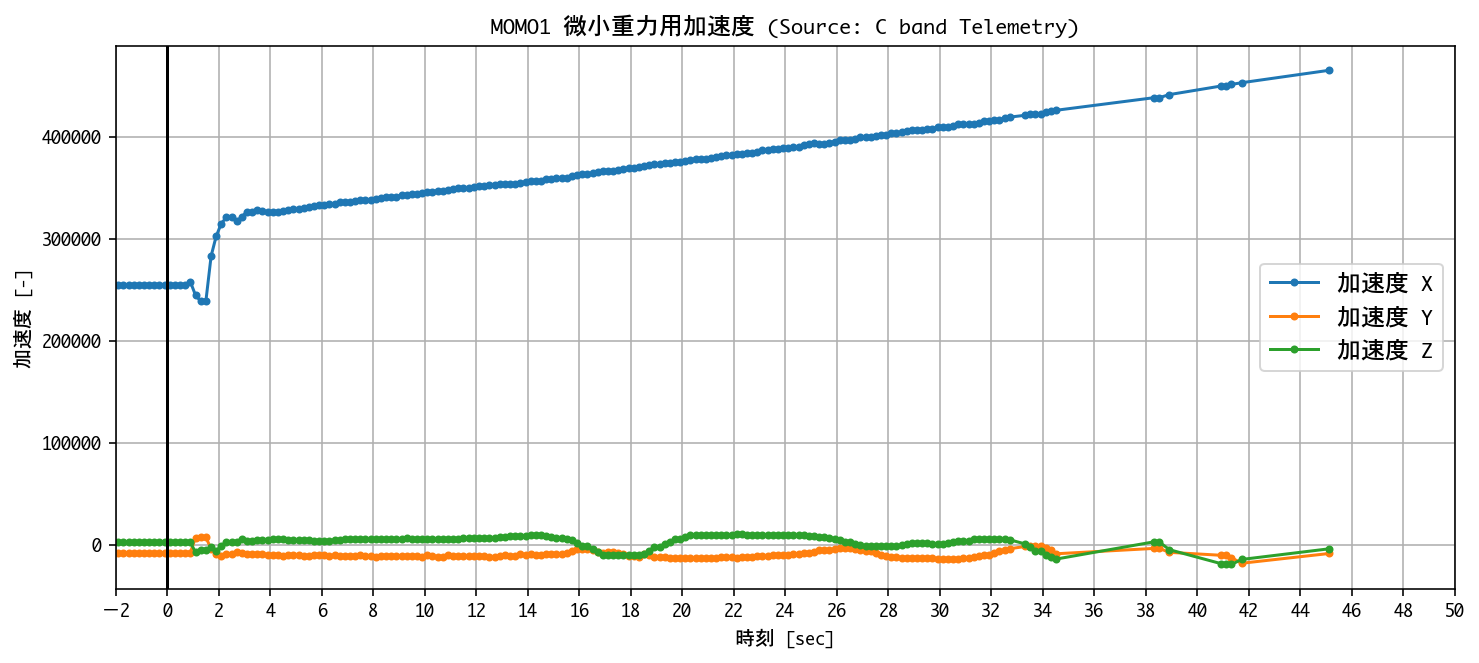

In [16]:
alpha = 1.0
plt.figure()
plt.plot(df_132["# T[s]"], df_132["ax[raw]"], "C0.-", alpha=alpha, label="加速度 X")
plt.plot(df_132["# T[s]"], df_132["ay[raw]"], "C1.-", alpha=alpha, label="加速度 Y")
plt.plot(df_132["# T[s]"], df_132["az[raw]"], "C2.-", alpha=alpha, label="加速度 Z")
plt.grid()
plt.legend(fontsize=12)
plt.title("MOMO1 微小重力用加速度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("加速度 [-]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "accelaration_microG" + ".png")

## GPSモジュールからOBC内部演算での位置

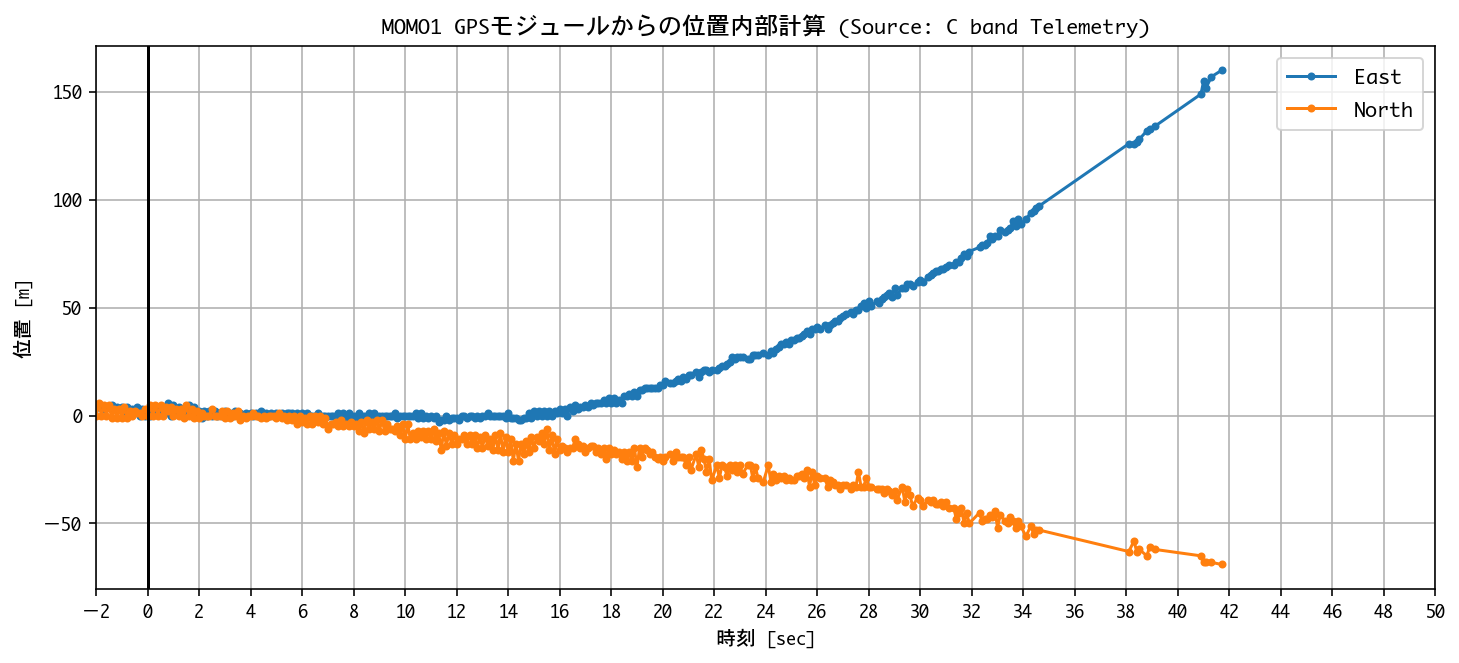

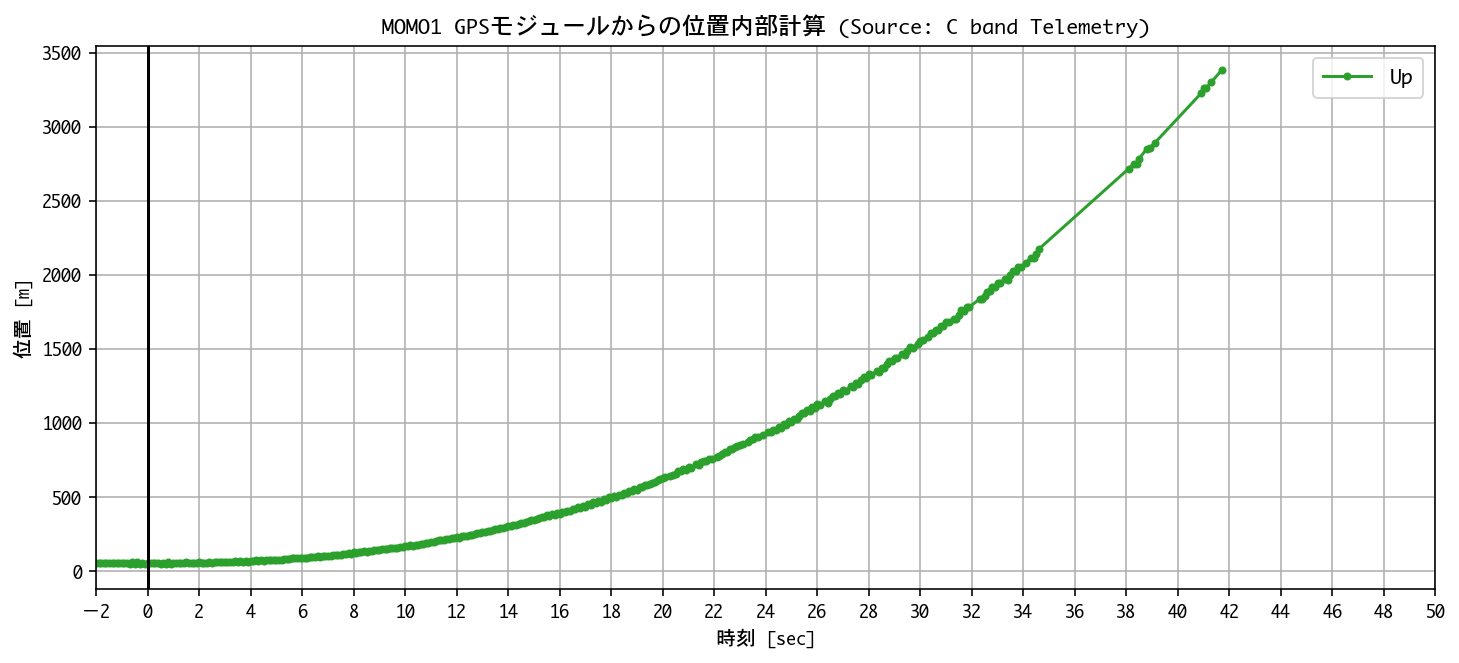

In [17]:
alpha = 1.0
plt.figure()
plt.plot(df_240["# T[s]"], df_240["enu_e[m]"], "C0.-", alpha=alpha, label="East")
plt.plot(df_240["# T[s]"], df_240["enu_n[m]"], "C1.-", alpha=alpha, label="North")
# plt.plot(df_240["# T[s]"], df_240["enu_u[m]"], "C2.-", alpha=alpha, label="Up")
plt.grid()
plt.legend(fontsize=12)
plt.title("MOMO1 GPSモジュールからの位置内部計算 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("位置 [m]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "GPS_position_EastNorth" + ".png")

plt.figure()
# plt.plot(df_240["# T[s]"], df_240["enu_e[m]"], "C0.-", alpha=alpha, label="East")
# plt.plot(df_240["# T[s]"], df_240["enu_n[m]"], "C1.-", alpha=alpha, label="North")
plt.plot(df_240["# T[s]"], df_240["enu_u[m]"], "C2.-", alpha=alpha, label="Up")
plt.grid()
plt.legend(fontsize=12)
plt.title("MOMO1 GPSモジュールからの位置内部計算 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("位置 [m]")
plt.xticks(np.arange(-2,52,2))
plt.xlim([-2, 50])
plt.axvline(x=0, color="k")
plt.savefig(savename + "GPS_position_Up" + ".png")